# BIM_Predict

- Establish dependencies between sheets.
- Preprocess and clean the data for consistency.
- Perform exploratory data analysis to find correlations.
- Engineer features for predictive modeling.
- Select the best machine learning models for predicting 011EC_Lot, 012EC_Ouvrage, 013EC_Localisation, and 014EC_Mode Constructif.


Next Steps:
- Data Cleaning & Preprocessing – Identify missing values, duplicates, and standardize formats across sheets.
- Exploratory Data Analysis (EDA) – Find correlations between sheets and detect significant trends.
- Feature Engineering – Create meaningful features to improve predictive models.
- Model Selection & Training – Pick the best machine learning algorithms to predict your target columns.
- Evaluation & Interpretation – Assess model performance and refine predictions


In [1]:
# Import libraries
import os
import pandas as pd

# Define project folder paths
BASE_DIR = "BIMpredict_project"
DATA_DIR = os.path.join(BASE_DIR, "data")
RAW_DATA_DIR = os.path.join(DATA_DIR, "raw_data")
PROCESSED_DATA_DIR = os.path.join(DATA_DIR, "processed_data")
PREDICTED_DATA_DIR = os.path.join(DATA_DIR, "predict_data")
MODELS_DIR = os.path.join(BASE_DIR, "models")
ML_MODELS_DIR = os.path.join(MODELS_DIR, "machine_learning")
DL_MODELS_DIR = os.path.join(MODELS_DIR, "deep_learning")
OTHER_MODELS_DIR = os.path.join(MODELS_DIR, "other")
PYTHON_MODULES_DIR = os.path.join(BASE_DIR, "python_modules")
PLOTS_DIR = os.path.join(BASE_DIR, "plots")

# List of directories to create
directories = [
    RAW_DATA_DIR, PROCESSED_DATA_DIR, PREDICTED_DATA_DIR,
    MODELS_DIR, ML_MODELS_DIR, DL_MODELS_DIR, OTHER_MODELS_DIR,
    PYTHON_MODULES_DIR, PLOTS_DIR
]

# Create directories if they don't exist
for directory in directories:
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Created directory: {directory}")
    else:
        print(f"Directory already exists: {directory}")

Directory already exists: BIMpredict_project/data/raw_data
Directory already exists: BIMpredict_project/data/processed_data
Directory already exists: BIMpredict_project/data/predict_data
Directory already exists: BIMpredict_project/models
Directory already exists: BIMpredict_project/models/machine_learning
Directory already exists: BIMpredict_project/models/deep_learning
Directory already exists: BIMpredict_project/models/other
Directory already exists: BIMpredict_project/python_modules
Directory already exists: BIMpredict_project/plots


### Paths Creating && Data Importing

In [2]:
import os
import pandas as pd

# List all Excel files in RAW_DATA_DIR
excel_files = [f for f in os.listdir(RAW_DATA_DIR) if f.endswith(".xlsx") or f.endswith(".xls")]

# Dictionary to store DataFrames for each file and sheet
dataframes = {}

# Process each Excel file
for file in excel_files:
    file_path = os.path.join(RAW_DATA_DIR, file)
    print(f"Loading: {file_path}")

    try:
        # Load Excel file
        excel_data = pd.ExcelFile(file_path)

        # Load all sheets dynamically
        for sheet_name in excel_data.sheet_names:
            df = excel_data.parse(sheet_name)

            # Save DataFrame with a unique identifier
            dataframes[f"{file}_{sheet_name}"] = df

    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# Display summary of loaded data
print(f"\nTotal files processed: {len(dataframes)}")
for key, df in dataframes.items():
    print(f"Loaded DataFrame: {key}, Shape: {df.shape}")

Loading: BIMpredict_project/data/raw_data/RawData-Cibles.xlsx

Total files processed: 4
Loaded DataFrame: RawData-Cibles.xlsx_Murs, Shape: (312, 96)
Loaded DataFrame: RawData-Cibles.xlsx_Sols, Shape: (107, 94)
Loaded DataFrame: RawData-Cibles.xlsx_Poutres, Shape: (246, 100)
Loaded DataFrame: RawData-Cibles.xlsx_Poteaux, Shape: (68, 87)


### Data Cleaning && PreProcessing

In [3]:
# Define required columns dynamically
required_columns = {
    "Murs": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "Hauteur",
             "Epaisseur", "AI", "AS", "Sols en intersection", "Sols coupés (u)", "Sols coupés (Ids)",
             "Sols coupants (u)", "Sols coupants (Ids)", "Sol au-dessus", "Sol en-dessous", "Fenêtres", "Portes",
             "Ouvertures", "Murs imbriqués", "Mur multicouche", "Mur empilé", "Profil modifié", "Extension inférieure",
             "Extension supérieure", "Partie inférieure attachée", "Partie supérieure attachée", "Décalage supérieur",
             "Décalage inférieur", "Matériau structurel"],

    "Sols": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "Murs en intersection",
             "Murs coupés (u)", "Murs coupés (Ids)", "Murs coupants (u)", "Murs coupants (Ids)", "Poutres en intersection",
             "Poutres coupés (u)", "Poutres coupés (Ids)", "Poutres coupants (u)", "Poutres coupants (Ids)",
             "Poteaux en intersection", "Poteaux coupés (u)", "Poteaux coupés (Ids)", "Poteaux coupants (u)",
             "Poteaux coupants (Ids)", "Ouvertures", "Sol multicouche", "Profil modifié", "Décalage par rapport au niveau",
             "Epaisseur", "Lié au volume", "Etude de l'élévation à la base", "Etude de l'élévation en haut",
             "Epaisseur du porteur", "Elévation au niveau du noyau inférieur", "Elévation au niveau du noyau supérieur",
             "Elévation en haut", "Elévation à la base", "Matériau structurel"],

    "Poutres": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "AI", "AS",
                "Hauteur totale", "Hauteur", "Sols en intersection", "Sols coupés (u)", "Sols coupés (Ids)",
                "Sols coupants (u)", "Sols coupants (Ids)", "Sol au-dessus", "Sol en-dessous", "Poteaux en intersection",
                "Poteaux coupés (u)", "Poteaux coupés (Ids)", "Poteaux coupants (u)", "Poteaux coupants (Ids)",
                "Etat de la jonction", "Valeur de décalage Z", "Justification Z", "Valeur de décalage Y", "Justification Y",
                "Justification YZ", "Matériau structurel", "Elévation du niveau de référence", "Elévation en haut",
                "Rotation de la section", "Orientation", "Décalage du niveau d'arrivée", "Décalage du niveau de départ",
                "Elévation à la base", "Longueur de coupe", "Longueur", "hauteur_section", "largeur_section"],

    "Poteaux": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "AI", "AS",
                "Hauteur", "Longueur", "Partie inférieure attachée", "Partie supérieure attachée", "Sols en intersection",
                "Sols coupés (u)", "Sols coupés (Ids)", "Sols coupants (u)", "Sols coupants (Ids)", "Poutres en intersection",
                "Poutres coupés (u)", "Poutres coupés (Ids)", "Poutres coupants (u)", "Poutres coupants (Ids)",
                "Matériau structurel", "Décalage supérieur", "Décalage inférieur", "Diamètre poteau", "h", "b",
                "hauteur_section", "largeur_section"]
}

# Filter multiple dataframes dynamically
cleaned_dataframes = {}  # Store cleaned versions

for df_name, df in dataframes.items():
    print(f"\n🟢 Original shape of {df_name}: {df.shape}")

    # Automatically detect the correct category for filtering
    for category, columns in required_columns.items():
        if category.lower() in df_name.lower():  # Match dynamically
            filtered_df = df[columns]  # Keep only the required columns
            cleaned_dataframes[df_name] = filtered_df
            print(f"✅ Shape after filtering {df_name}: {filtered_df.shape}")
            break  # Stop looping once the correct match is found
    else:
        print(f"⚠️ No matching category for {df_name}, skipping filtering.")


🟢 Original shape of RawData-Cibles.xlsx_Murs: (312, 96)
✅ Shape after filtering RawData-Cibles.xlsx_Murs: (312, 30)

🟢 Original shape of RawData-Cibles.xlsx_Sols: (107, 94)
✅ Shape after filtering RawData-Cibles.xlsx_Sols: (107, 34)

🟢 Original shape of RawData-Cibles.xlsx_Poutres: (246, 100)
✅ Shape after filtering RawData-Cibles.xlsx_Poutres: (246, 39)

🟢 Original shape of RawData-Cibles.xlsx_Poteaux: (68, 87)
✅ Shape after filtering RawData-Cibles.xlsx_Poteaux: (68, 29)


In [4]:
import re

# Ensure all column names are lowercase and replace spaces & special characters
def clean_column_names(df):
    df.columns = df.columns.str.lower().str.replace(r"\s+", "_", regex=True).str.replace(r"[^\w_]", "", regex=True)
    return df

# Apply cleaning dynamically to filtered DataFrames instead of the original `dataframes`
cleaned_dataframes = {name: clean_column_names(df) for name, df in cleaned_dataframes.items()}

print("✅ Column names cleaned successfully across all cleaned dataframes!")

# Ensure duplicates & missing values are removed while storing cleaned versions
final_cleaned_dataframes = {}

for df_name, df in cleaned_dataframes.items():
    print(f"\n🟢 Processing {df_name}...")

    # Make a copy to prevent unintended modifications
    df = df.copy()

    # Display initial shape
    initial_shape = df.shape
    print(f"📌 Initial shape: {initial_shape}")

    # Remove duplicate rows
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"⚠️ Found {duplicates} duplicate rows. Removing...")
        df.drop_duplicates(inplace=True)
    else:
        print("✅ No duplicate rows found.")

    # Detect & drop columns with 100% missing values
    missing_cols = df.columns[df.isnull().mean() == 1]
    if len(missing_cols) > 0:
        print(f"⚠️ Dropping {len(missing_cols)} completely empty columns: {list(missing_cols)}")
        df.drop(columns=missing_cols, inplace=True)
    else:
        print("✅ No fully missing columns detected.")

    # Store final cleaned DataFrame
    final_cleaned_dataframes[df_name] = df

    # Display final shape after cleaning
    final_shape = df.shape
    print(f"📌 Final shape after cleaning: {final_shape}")

✅ Column names cleaned successfully across all cleaned dataframes!

🟢 Processing RawData-Cibles.xlsx_Murs...
📌 Initial shape: (312, 30)
✅ No duplicate rows found.
⚠️ Dropping 1 completely empty columns: ['sols_coupés_ids']
📌 Final shape after cleaning: (312, 29)

🟢 Processing RawData-Cibles.xlsx_Sols...
📌 Initial shape: (107, 34)
✅ No duplicate rows found.
⚠️ Dropping 3 completely empty columns: ['murs_coupants_ids', 'poutres_coupants_ids', 'poteaux_coupants_ids']
📌 Final shape after cleaning: (107, 31)

🟢 Processing RawData-Cibles.xlsx_Poutres...
📌 Initial shape: (246, 39)
✅ No duplicate rows found.
⚠️ Dropping 1 completely empty columns: ['sols_coupés_ids']
📌 Final shape after cleaning: (246, 38)

🟢 Processing RawData-Cibles.xlsx_Poteaux...
📌 Initial shape: (68, 29)
✅ No duplicate rows found.
⚠️ Dropping 1 completely empty columns: ['sols_coupés_ids']
📌 Final shape after cleaning: (68, 28)


In [5]:
# Define target variable names
TARGET_COLUMNS = ['011ec_lot', '012ec_ouvrage', '013ec_localisation','014ec_mode_constructif']

# Identify target columns dynamically across all DataFrames
target_columns_found = set()
for df_name, df in cleaned_dataframes.items():
    found_targets = [col for col in df.columns if col in TARGET_COLUMNS]
    target_columns_found.update(found_targets)

print(f"\nTarget columns detected across datasets: {target_columns_found}")


Target columns detected across datasets: {'011ec_lot', '013ec_localisation', '014ec_mode_constructif', '012ec_ouvrage'}


### Exploratory Data Analysis (EDA)

In [6]:
# Ensure missing values are filled in the processed datasets
for df_name, df in final_cleaned_dataframes.items():
    print(f"\n🟢 Filling missing values for {df_name}...")

    # Display shape before filling missing values
    initial_shape = df.shape
    print(f"📌 Initial shape before filling NaN: {initial_shape}")

    # Fill missing values with 0
    df.fillna(0, inplace=True)

    # Store updated dataframe back
    final_cleaned_dataframes[df_name] = df

    # Display shape after processing
    final_shape = df.shape
    print(f"✅ Final shape after filling NaN: {final_shape}")

print("🚀 Missing values successfully handled across all datasets!")


🟢 Filling missing values for RawData-Cibles.xlsx_Murs...
📌 Initial shape before filling NaN: (312, 29)
✅ Final shape after filling NaN: (312, 29)

🟢 Filling missing values for RawData-Cibles.xlsx_Sols...
📌 Initial shape before filling NaN: (107, 31)
✅ Final shape after filling NaN: (107, 31)

🟢 Filling missing values for RawData-Cibles.xlsx_Poutres...
📌 Initial shape before filling NaN: (246, 38)
✅ Final shape after filling NaN: (246, 38)

🟢 Filling missing values for RawData-Cibles.xlsx_Poteaux...
📌 Initial shape before filling NaN: (68, 28)
✅ Final shape after filling NaN: (68, 28)
🚀 Missing values successfully handled across all datasets!


In [7]:
# Display basic statistics for all cleaned sheets
for df_name, df in cleaned_dataframes.items():
    print(f"\nSummary statistics for {df_name}:")

    print(df.describe())


Summary statistics for RawData-Cibles.xlsx_Murs:
                 id     hauteur   epaisseur          ai          as  \
count  3.120000e+02  312.000000  312.000000  312.000000  312.000000   
mean   1.791045e+06    3.546066    0.225449   -1.130053    2.416013   
std    5.505733e+03    1.196444    0.165362    2.103918    2.363908   
min    1.787858e+06    0.290000    0.150000   -4.620000   -3.700000   
25%    1.789186e+06    3.120000    0.150000   -3.350000   -0.020000   
50%    1.789625e+06    3.780000    0.200000   -0.130000    3.465000   
75%    1.791428e+06    4.150000    0.212500   -0.130000    3.690000   
max    1.839891e+06    9.480000    1.510000    4.130000    9.480000   

       sols_en_intersection  sols_coupés_u  sols_coupés_ids  sols_coupants_u  \
count            312.000000          312.0              0.0       312.000000   
mean               0.157051            0.0              NaN         0.615385   
std                0.465202            0.0              NaN         0.

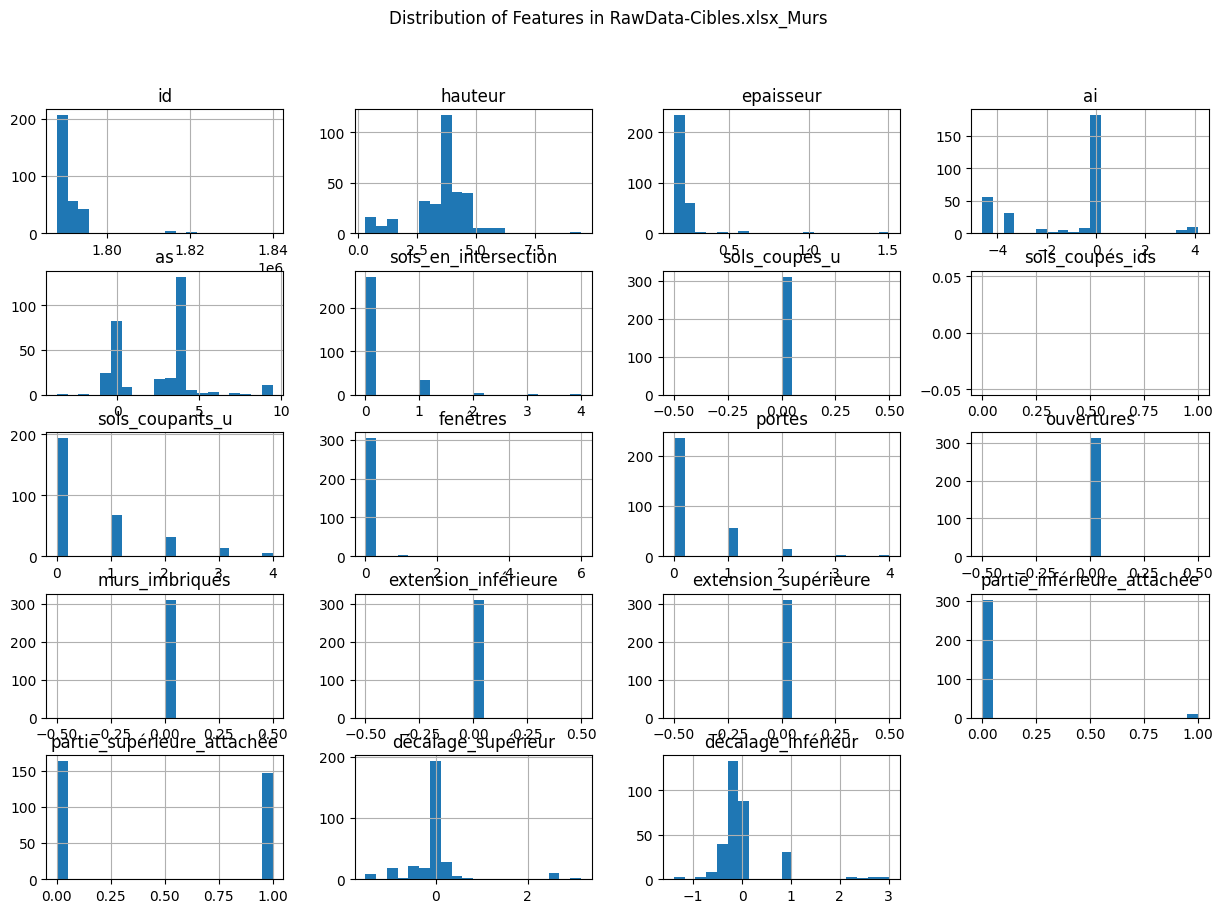

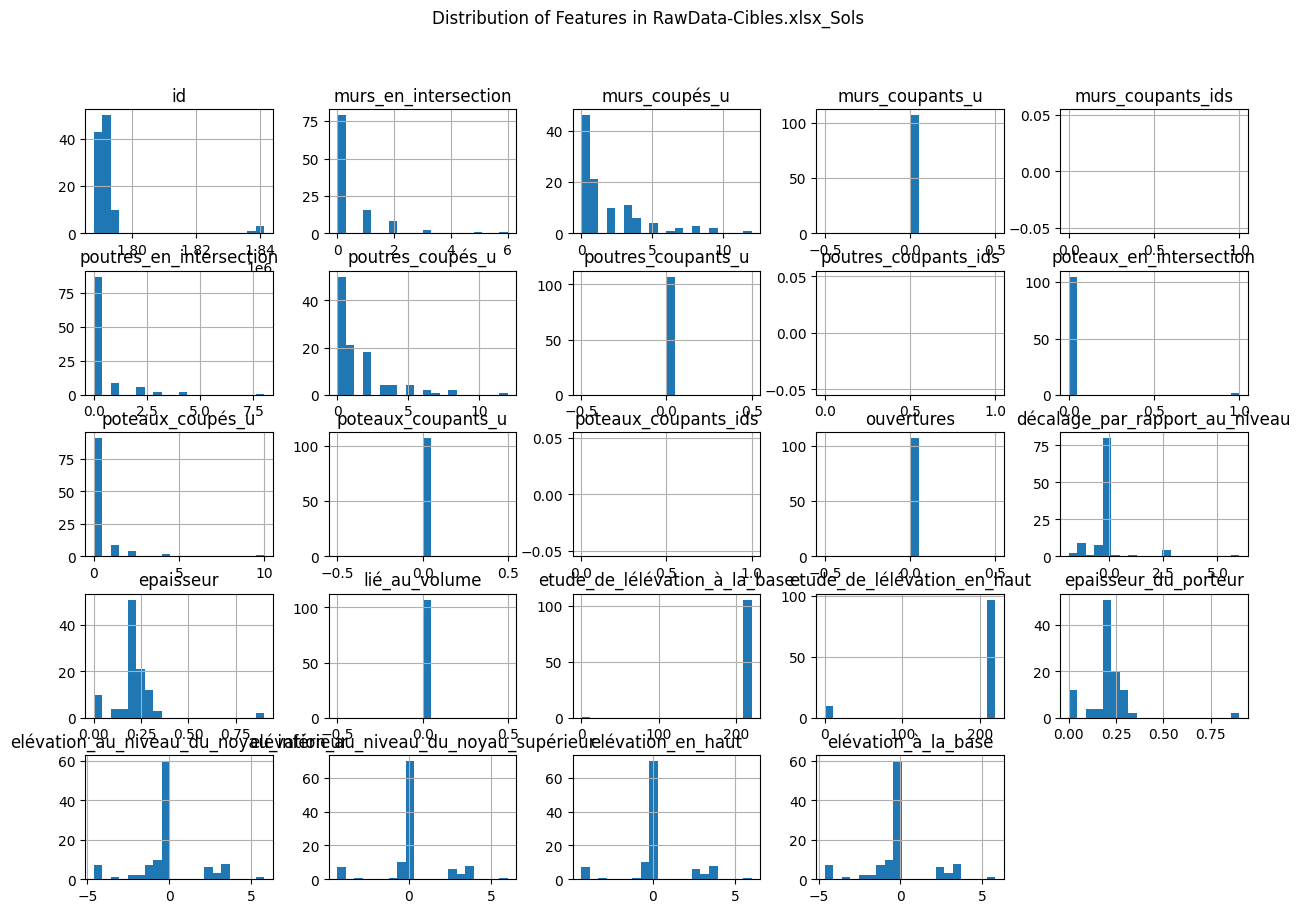

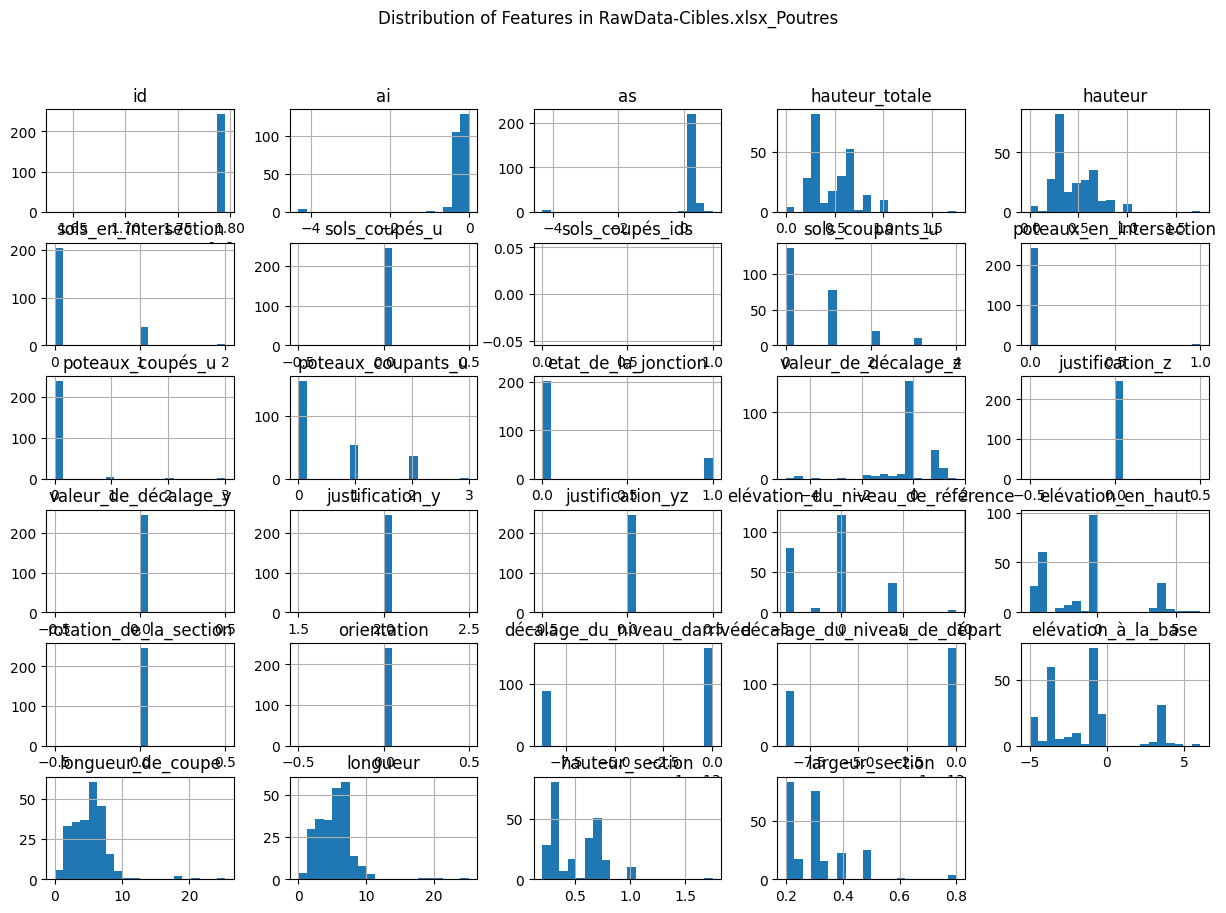

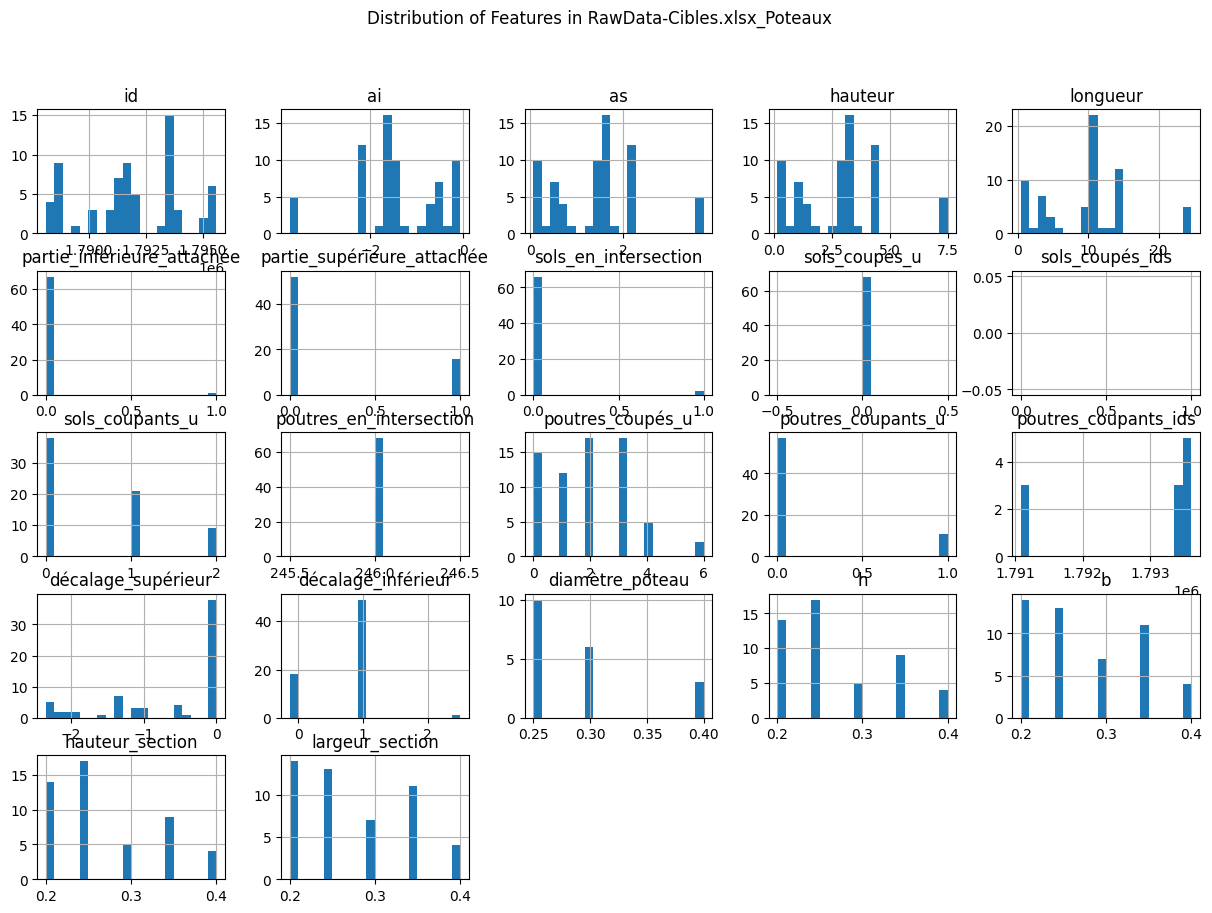

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
for df_name, df in cleaned_dataframes.items():
    df.hist(figsize=(15,10), bins=20)
    plt.suptitle(f"Distribution of Features in {df_name}")
    plt.show()

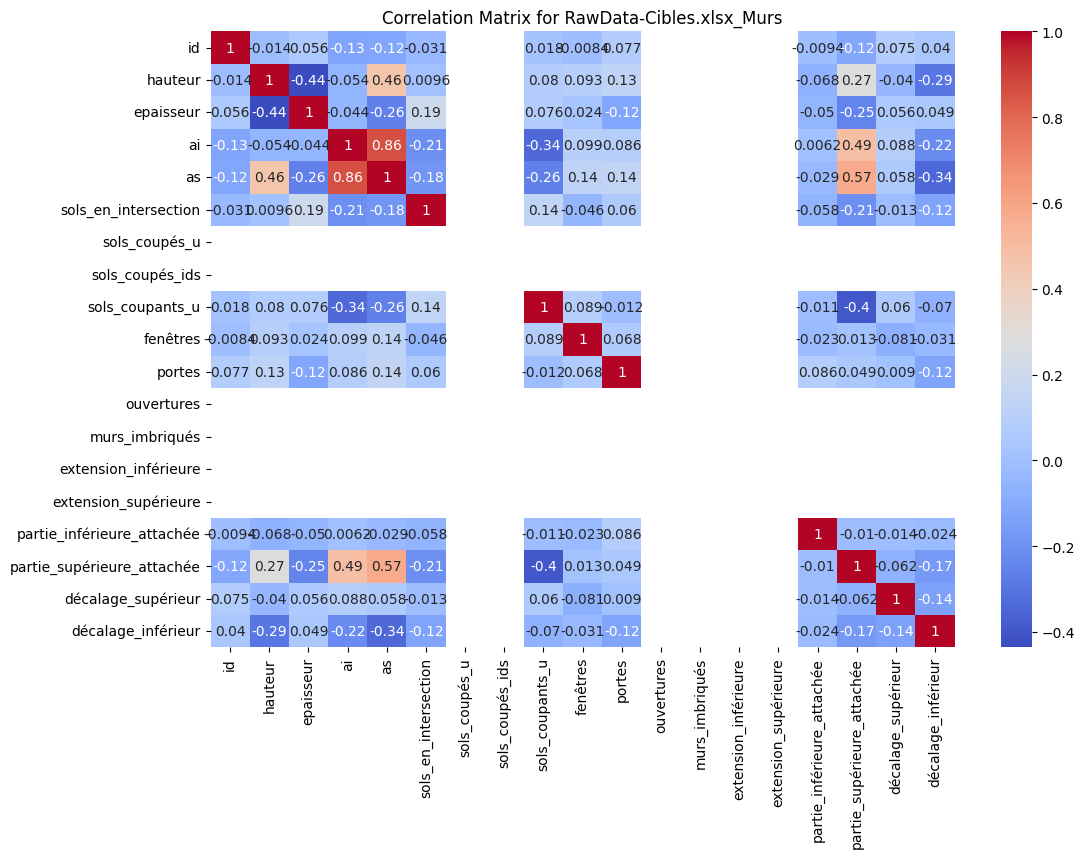

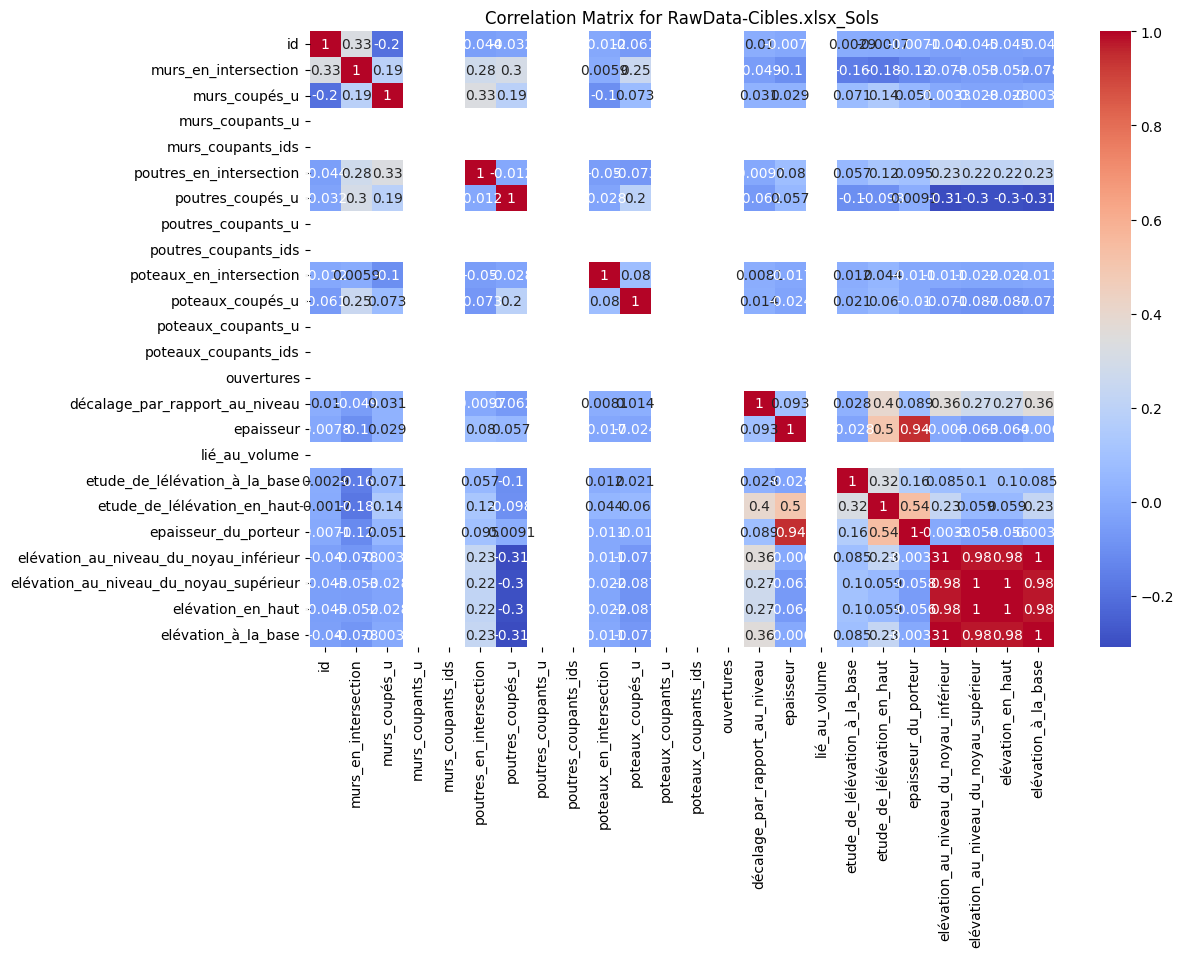

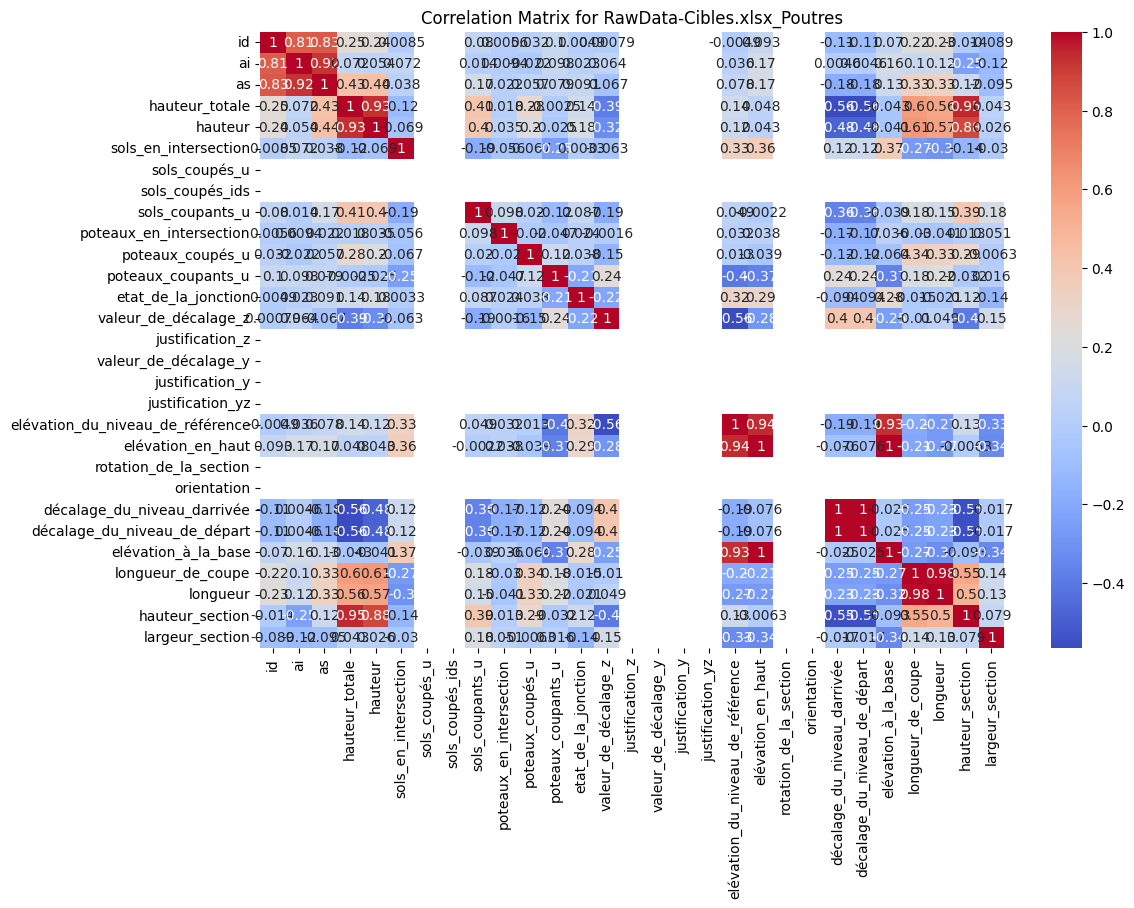

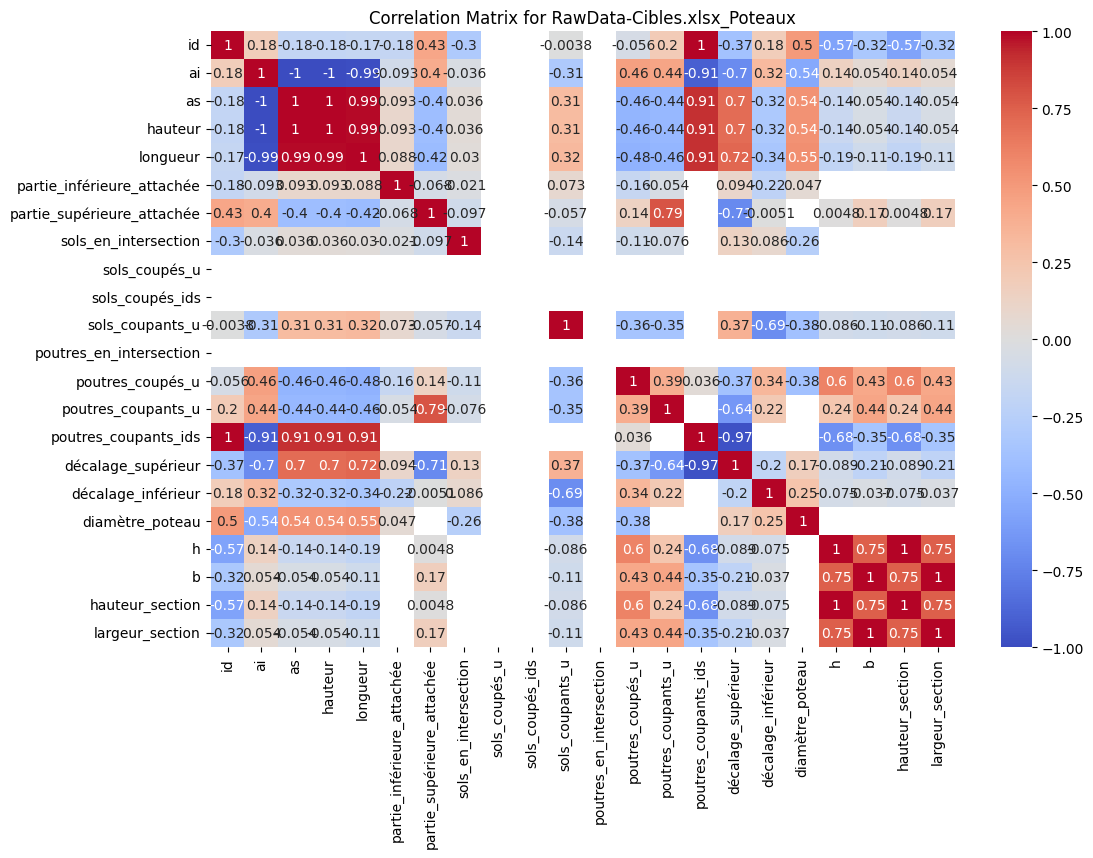

In [9]:
# Compute correlation matrices for numeric columns
for df_name, df in cleaned_dataframes.items():
    numeric_df = df.select_dtypes(include=["number"])
    correlation_matrix = numeric_df.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Matrix for {df_name}")
    plt.show()

In [10]:
import os

# Ensure base plots directory exists
if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

# Function to generate subfolder paths for each Excel file
def get_plot_subfolder(file_name):
    subfolder_name = f"{file_name.replace('.xlsx', '').replace('.xls', '')}_Plots"
    subfolder_path = os.path.join(PLOTS_DIR, subfolder_name)

    # Create the subfolder if it doesn't exist
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

    return subfolder_path

# Save histograms
for df_name, df in cleaned_dataframes.items():
    plt.figure(figsize=(15, 10))
    df.hist(bins=20)
    plt.suptitle(f"Distribution of Features in {df_name}")

    # Extract the corresponding Excel file name
    file_name = df_name.split("_")[0]  # Extracts RawData_Cibles.xlsx from "RawData_Cibles.xlsx_Murs"
    plot_subfolder = get_plot_subfolder(file_name)

    # Define save path
    plot_path = os.path.join(plot_subfolder, f"{df_name}_histogram.png")
    plt.savefig(plot_path)
    print(f"Saved histogram in: {plot_path}")

    plt.close()

# Save correlation matrices
for df_name, df in cleaned_dataframes.items():
    numeric_df = df.select_dtypes(include=["number"])
    correlation_matrix = numeric_df.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Matrix for {df_name}")

    # Extract Excel file name and subfolder
    file_name = df_name.split("_")[0]
    plot_subfolder = get_plot_subfolder(file_name)

    # Define save path
    plot_path = os.path.join(plot_subfolder, f"{df_name}_correlation.png")
    plt.savefig(plot_path)
    print(f"Saved correlation matrix in: {plot_path}")

    plt.close()

Saved histogram in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Murs_histogram.png
Saved histogram in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Sols_histogram.png
Saved histogram in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Poutres_histogram.png
Saved histogram in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Poteaux_histogram.png
Saved correlation matrix in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Murs_correlation.png
Saved correlation matrix in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Sols_correlation.png
Saved correlation matrix in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Poutres_correlation.png
Saved correlation matrix in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Poteaux_correlation.png


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

### Feature Selection

In [11]:
# from sklearn.feature_selection import VarianceThreshold

# # Function to remove low-variance features while keeping specific keywords
# def remove_low_variance(df, threshold=0.01):
#     selector = VarianceThreshold(threshold)
#     numeric_df = df.select_dtypes(include=["number"])  # Focus only on numerical columns
#     selector.fit(numeric_df)

#     # Identify low-variance columns
#     low_variance_cols = numeric_df.columns[~selector.get_support()]

#     # Keep columns containing specific keywords
#     keep_cols = [col for col in low_variance_cols if any(keyword in col.lower() for keyword in ["coupés", "coupants", "coupantés"])]

#     # Columns to drop (excluding those we want to keep)
#     drop_cols = [col for col in low_variance_cols if col not in keep_cols]

#     # Display shape before filtering
#     initial_shape = df.shape
#     print(f"\n📌 Processing {df.shape[0]} rows & {df.shape[1]} columns")

#     # Drop low-variance features
#     df.drop(columns=drop_cols, inplace=True)

#     # Display shape after filtering
#     final_shape = df.shape
#     print(f"⚠️ Dropped {len(drop_cols)} low-variance columns (excluding 'coupés', 'coupants', 'coupantés'): {drop_cols}")
#     print(f"✅ Final shape after filtering: {final_shape}")

#     return df

# # Apply filtering to the fully cleaned dataset
# final_cleaned_dataframes = {name: remove_low_variance(df) for name, df in final_cleaned_dataframes.items()}

# print("🚀 Final variance-based feature selection completed successfully!")

In [12]:
# # Function to remove highly correlated features and display shape changes
# def remove_highly_correlated(df, threshold=0.98):
#     numeric_df = df.select_dtypes(include=["number"])
#     correlation_matrix = numeric_df.corr().abs()

#     # Identify highly correlated features
#     upper_triangle = correlation_matrix.where(correlation_matrix > threshold).stack().reset_index()
#     correlated_features = set(upper_triangle["level_0"])

#     # Display shape before
#     initial_shape = df.shape
#     print(f"\n📌 Processing {df.shape[0]} rows & {df.shape[1]} columns")

#     # Drop highly correlated features
#     df.drop(columns=correlated_features, inplace=True)

#     # Display shape after
#     final_shape = df.shape
#     print(f"⚠️ Dropped {len(correlated_features)} highly correlated columns: {list(correlated_features)}")
#     print(f"✅ Final shape after filtering: {final_shape}")

#     return df

# # Apply to fully cleaned dataset
# final_cleaned_dataframes = {name: remove_highly_correlated(df) for name, df in final_cleaned_dataframes.items()}

# print("🚀 Final correlation-based feature selection completed successfully!")

In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

# Function to remove low-variance & highly correlated features
def optimize_feature_selection(df, variance_threshold=0.02, correlation_threshold=0.98):
    print(f"\n🔍 Processing {df.shape[0]} rows & {df.shape[1]} columns")

    # Step 1: Remove Low-Variance Features
    selector = VarianceThreshold(variance_threshold)
    numeric_df = df.select_dtypes(include=["number"])  # Focus only on numerical columns
    selector.fit(numeric_df)

    low_variance_cols = numeric_df.columns[~selector.get_support()]
    keep_cols = [col for col in low_variance_cols if any(keyword in col.lower() for keyword in ["coupés", "coupants", "coupantés"])]
    drop_cols = [col for col in low_variance_cols if col not in keep_cols]

    df.drop(columns=drop_cols, inplace=True)
    print(f"⚠️ Dropped {len(drop_cols)} low-variance columns (excluding 'coupés', 'coupants', 'coupantés'): {drop_cols}")

    # Step 2: Remove Highly Correlated Features
    numeric_df = df.select_dtypes(include=["number"])
    correlation_matrix = numeric_df.corr().abs()
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    correlated_features = [col for col in upper_triangle.columns if any(upper_triangle[col] > correlation_threshold)]

    df.drop(columns=correlated_features, inplace=True)
    print(f"⚠️ Dropped {len(correlated_features)} highly correlated columns: {correlated_features}")

    print(f"✅ Final shape after filtering: {df.shape}")
    return df

# Apply optimized feature selection to all datasets
final_cleaned_dataframes = {name: optimize_feature_selection(df) for name, df in final_cleaned_dataframes.items()}

print("🚀 Optimized feature selection completed successfully!")


🔍 Processing 312 rows & 29 columns
⚠️ Dropped 4 low-variance columns (excluding 'coupés', 'coupants', 'coupantés'): ['ouvertures', 'murs_imbriqués', 'extension_inférieure', 'extension_supérieure']
⚠️ Dropped 0 highly correlated columns: []
✅ Final shape after filtering: (312, 25)

🔍 Processing 107 rows & 31 columns
⚠️ Dropped 5 low-variance columns (excluding 'coupés', 'coupants', 'coupantés'): ['poteaux_en_intersection', 'ouvertures', 'epaisseur', 'lié_au_volume', 'epaisseur_du_porteur']
⚠️ Dropped 2 highly correlated columns: ['elévation_en_haut', 'elévation_à_la_base']
✅ Final shape after filtering: (107, 24)

🔍 Processing 246 rows & 38 columns
⚠️ Dropped 10 low-variance columns (excluding 'coupés', 'coupants', 'coupantés'): ['poteaux_en_intersection', 'justification_z', 'valeur_de_décalage_y', 'justification_y', 'justification_yz', 'rotation_de_la_section', 'orientation', 'décalage_du_niveau_darrivée', 'décalage_du_niveau_de_départ', 'largeur_section']
⚠️ Dropped 2 highly correlat

In [14]:
# %pip install ipywidgets

In [15]:
import os

# Function to generate subfolder paths for storing SHAP plots
def get_plot_subfolder(file_name):
    subfolder_name = f"{file_name}_Plots"
    subfolder_path = os.path.join(PLOTS_DIR, subfolder_name)

    # Create the subfolder if it doesn't exist
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

    return subfolder_path

# ✅ Ensure SHAP is applied to the fully processed dataset
final_shap_dataframes = final_cleaned_dataframes  # Use the cleaned dataset after variance/correlation removal

print("🚀 SHAP analysis will now use the final processed data!")

for target_column in TARGET_COLUMNS:
    for df_name, df in final_cleaned_dataframes.items():  # Use the final processed dataset
        if target_column in df.columns:
            unique_values = df[target_column].nunique()
            print(f"{target_column} in {df_name} has {unique_values} unique values.")

🚀 SHAP analysis will now use the final processed data!
011ec_lot in RawData-Cibles.xlsx_Murs has 1 unique values.
011ec_lot in RawData-Cibles.xlsx_Sols has 1 unique values.
011ec_lot in RawData-Cibles.xlsx_Poutres has 2 unique values.
011ec_lot in RawData-Cibles.xlsx_Poteaux has 1 unique values.
012ec_ouvrage in RawData-Cibles.xlsx_Murs has 7 unique values.
012ec_ouvrage in RawData-Cibles.xlsx_Sols has 6 unique values.
012ec_ouvrage in RawData-Cibles.xlsx_Poutres has 5 unique values.
012ec_ouvrage in RawData-Cibles.xlsx_Poteaux has 3 unique values.
013ec_localisation in RawData-Cibles.xlsx_Murs has 6 unique values.
013ec_localisation in RawData-Cibles.xlsx_Sols has 5 unique values.
013ec_localisation in RawData-Cibles.xlsx_Poutres has 7 unique values.
013ec_localisation in RawData-Cibles.xlsx_Poteaux has 3 unique values.
014ec_mode_constructif in RawData-Cibles.xlsx_Murs has 5 unique values.
014ec_mode_constructif in RawData-Cibles.xlsx_Sols has 2 unique values.
014ec_mode_constructif 


Processing SHAP for RawData-Cibles.xlsx_Murs...
🎯 Target columns found in RawData-Cibles.xlsx_Murs: ['012ec_ouvrage', '013ec_localisation', '014ec_mode_constructif']
🔍 Analyzing SHAP for target: 012ec_ouvrage
📌 Initial shape before SHAP processing: (312, 25)
📊 SHAP values shape: 312, Feature matrix shape: (312, 22)


<Figure size 640x480 with 0 Axes>

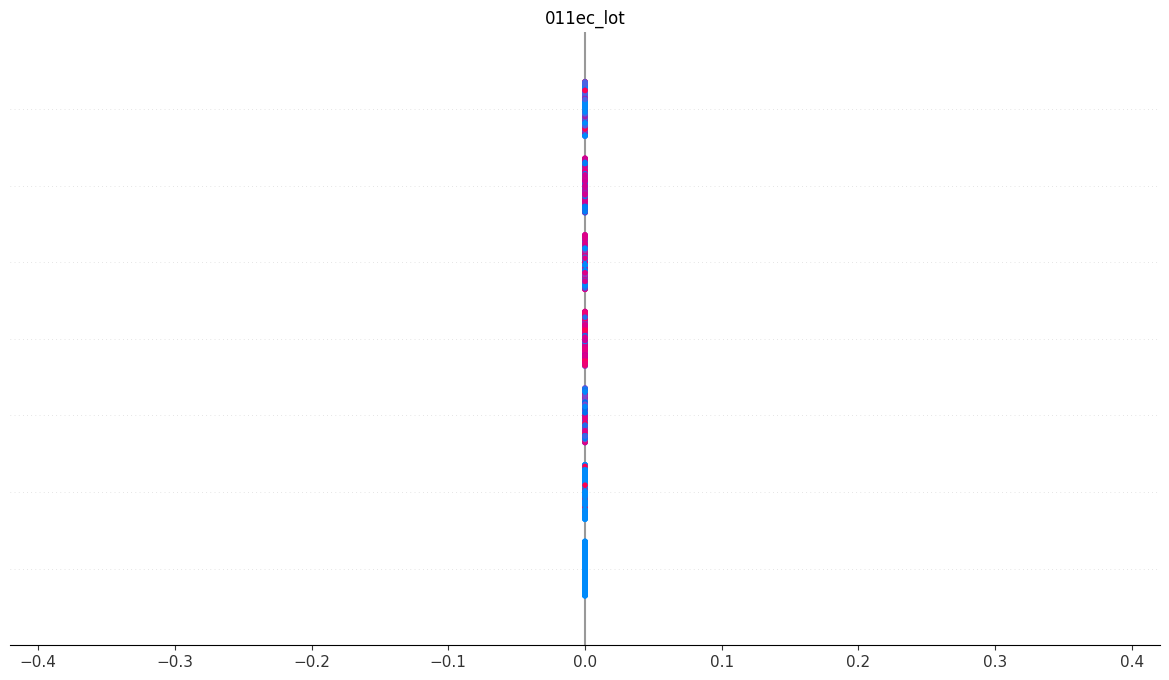

✅ Saved SHAP plot for 012ec_ouvrage in: plots/SHAP_RawData-Cibles.xlsx_Murs_Plots/012ec_ouvrage_SHAP.png
📌 Final shape after SHAP processing: (312, 22)
🔍 Analyzing SHAP for target: 013ec_localisation
📌 Initial shape before SHAP processing: (312, 25)
📊 SHAP values shape: 312, Feature matrix shape: (312, 22)


<Figure size 640x480 with 0 Axes>

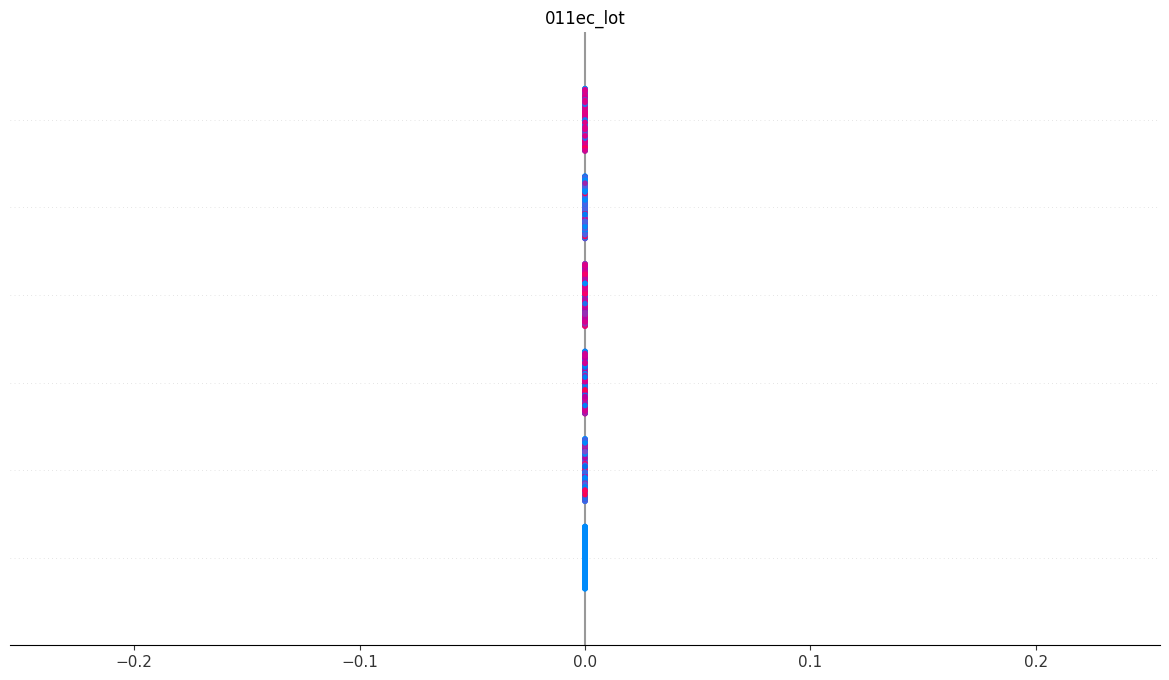

✅ Saved SHAP plot for 013ec_localisation in: plots/SHAP_RawData-Cibles.xlsx_Murs_Plots/013ec_localisation_SHAP.png
📌 Final shape after SHAP processing: (312, 22)
🔍 Analyzing SHAP for target: 014ec_mode_constructif
📌 Initial shape before SHAP processing: (312, 25)
📊 SHAP values shape: 312, Feature matrix shape: (312, 22)


<Figure size 640x480 with 0 Axes>

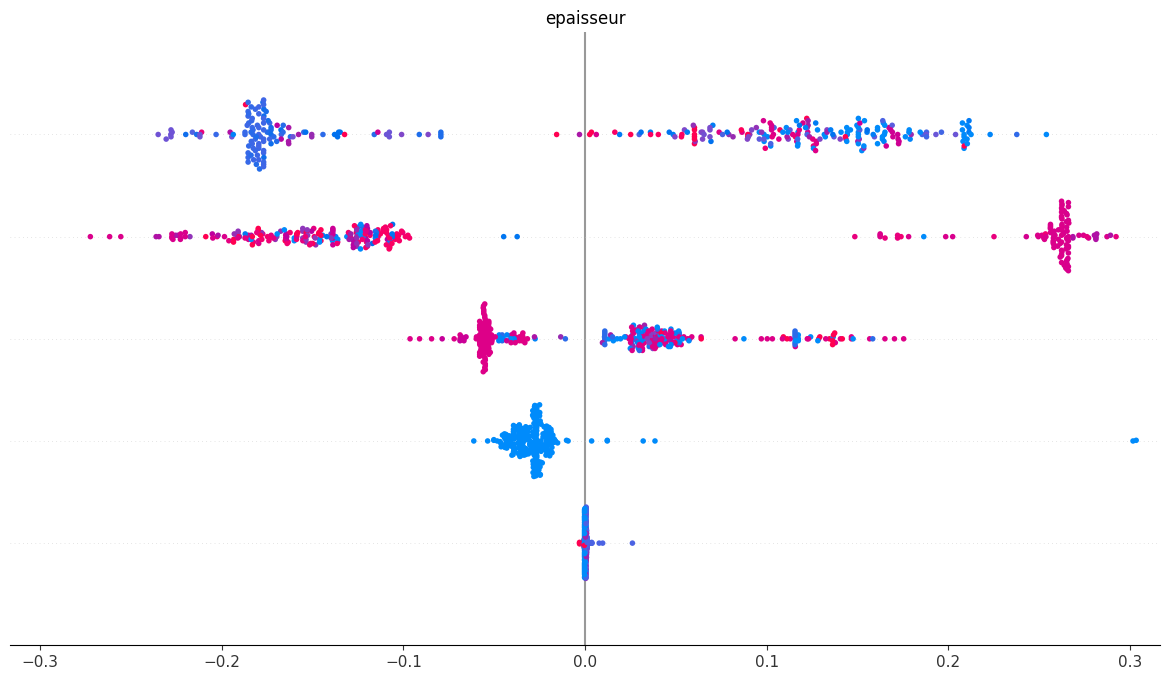

✅ Saved SHAP plot for 014ec_mode_constructif in: plots/SHAP_RawData-Cibles.xlsx_Murs_Plots/014ec_mode_constructif_SHAP.png
📌 Final shape after SHAP processing: (312, 22)

Processing SHAP for RawData-Cibles.xlsx_Sols...
🎯 Target columns found in RawData-Cibles.xlsx_Sols: ['012ec_ouvrage', '013ec_localisation', '014ec_mode_constructif']
🔍 Analyzing SHAP for target: 012ec_ouvrage
📌 Initial shape before SHAP processing: (107, 24)
📊 SHAP values shape: 107, Feature matrix shape: (107, 21)


<Figure size 640x480 with 0 Axes>

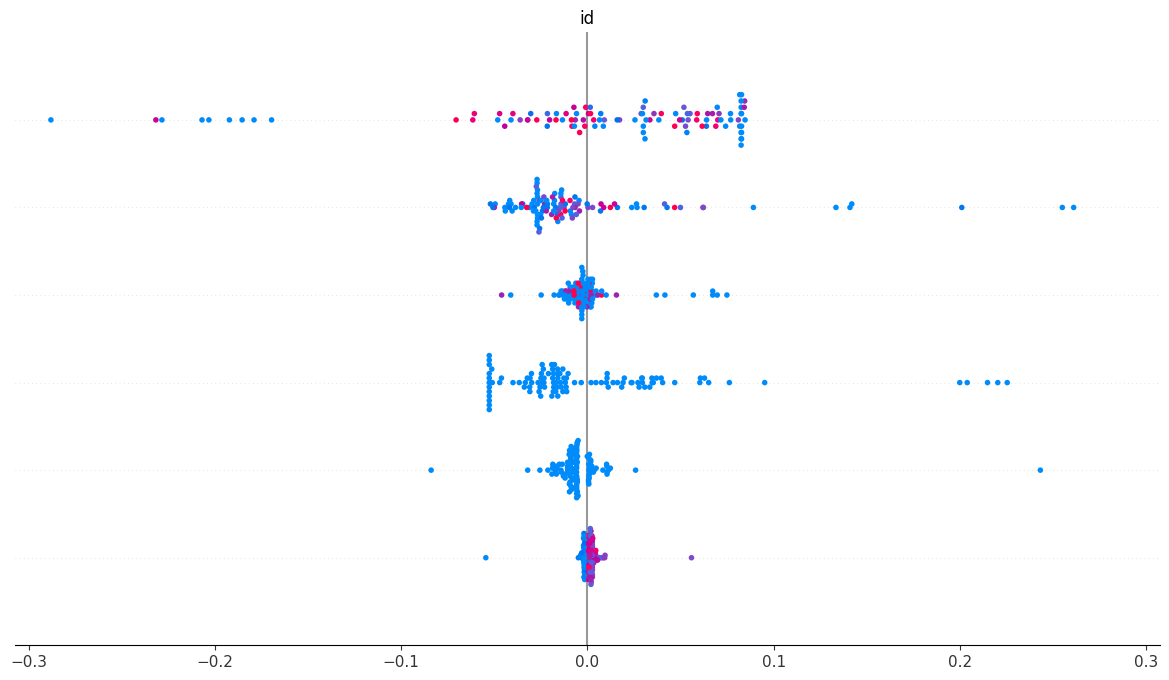

✅ Saved SHAP plot for 012ec_ouvrage in: plots/SHAP_RawData-Cibles.xlsx_Sols_Plots/012ec_ouvrage_SHAP.png
📌 Final shape after SHAP processing: (107, 21)
🔍 Analyzing SHAP for target: 013ec_localisation
📌 Initial shape before SHAP processing: (107, 24)
📊 SHAP values shape: 107, Feature matrix shape: (107, 21)


<Figure size 640x480 with 0 Axes>

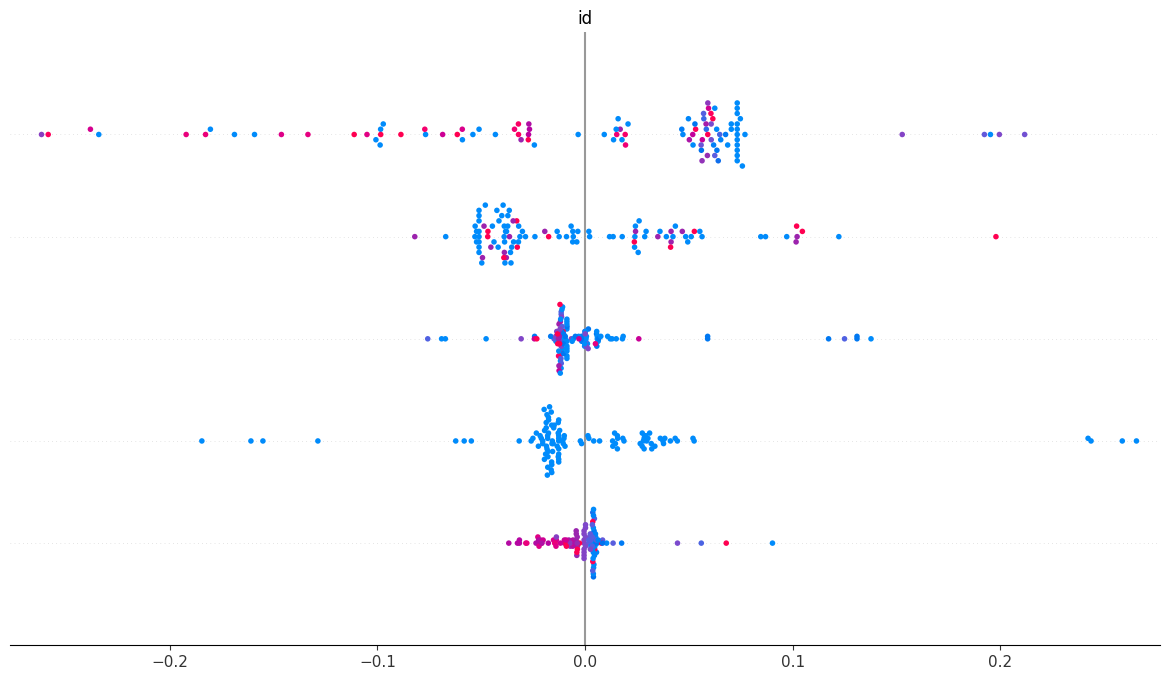

✅ Saved SHAP plot for 013ec_localisation in: plots/SHAP_RawData-Cibles.xlsx_Sols_Plots/013ec_localisation_SHAP.png
📌 Final shape after SHAP processing: (107, 21)
🔍 Analyzing SHAP for target: 014ec_mode_constructif
📌 Initial shape before SHAP processing: (107, 24)
📊 SHAP values shape: 107, Feature matrix shape: (107, 21)


<Figure size 640x480 with 0 Axes>

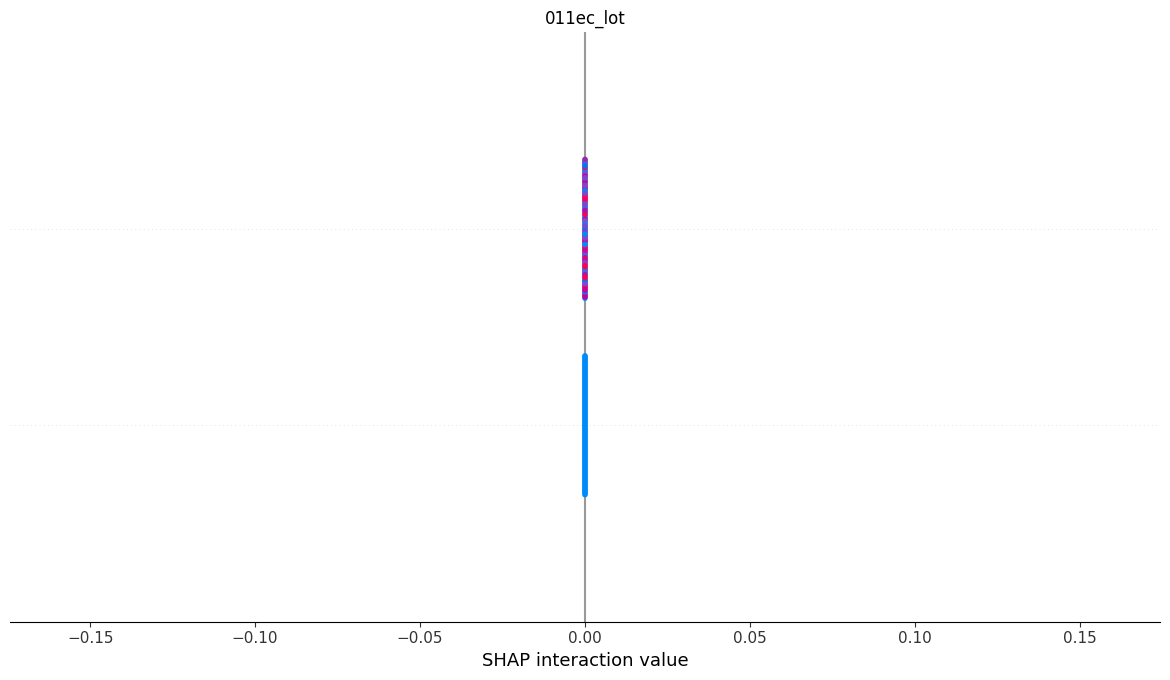

✅ Saved SHAP plot for 014ec_mode_constructif in: plots/SHAP_RawData-Cibles.xlsx_Sols_Plots/014ec_mode_constructif_SHAP.png
📌 Final shape after SHAP processing: (107, 21)

Processing SHAP for RawData-Cibles.xlsx_Poutres...
🎯 Target columns found in RawData-Cibles.xlsx_Poutres: ['011ec_lot', '012ec_ouvrage', '013ec_localisation', '014ec_mode_constructif']
🔍 Analyzing SHAP for target: 011ec_lot
📌 Initial shape before SHAP processing: (246, 26)
📊 SHAP values shape: 246, Feature matrix shape: (246, 22)


<Figure size 640x480 with 0 Axes>

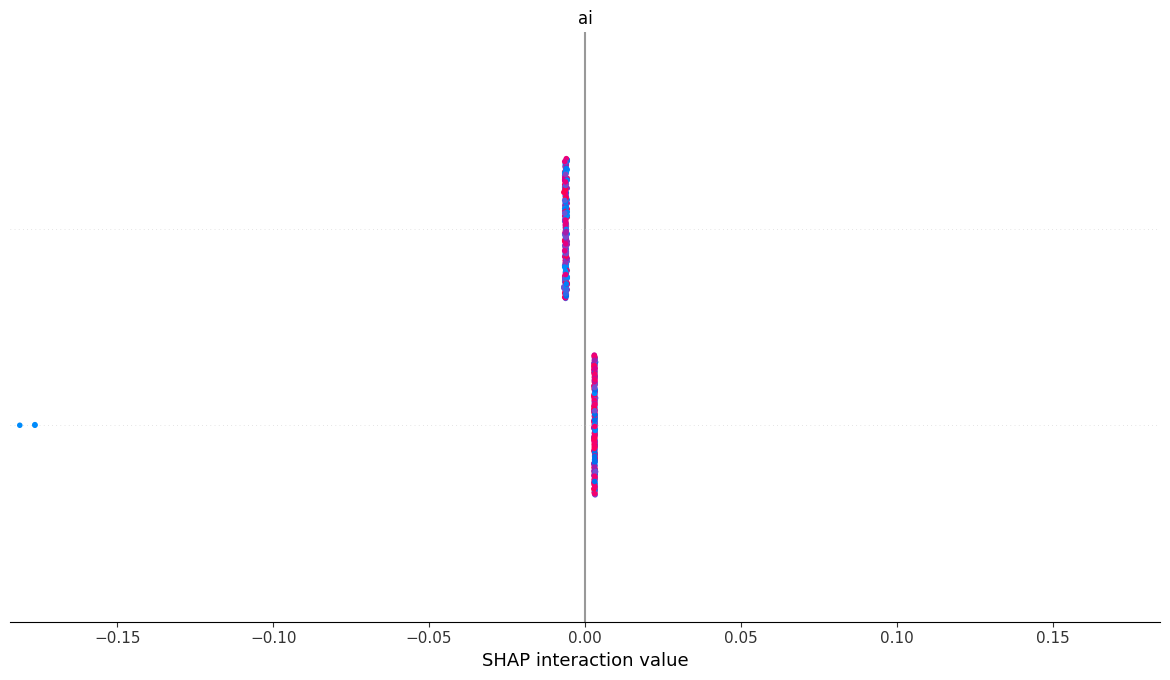

✅ Saved SHAP plot for 011ec_lot in: plots/SHAP_RawData-Cibles.xlsx_Poutres_Plots/011ec_lot_SHAP.png
📌 Final shape after SHAP processing: (246, 22)
🔍 Analyzing SHAP for target: 012ec_ouvrage
📌 Initial shape before SHAP processing: (246, 26)
📊 SHAP values shape: 246, Feature matrix shape: (246, 22)


<Figure size 640x480 with 0 Axes>

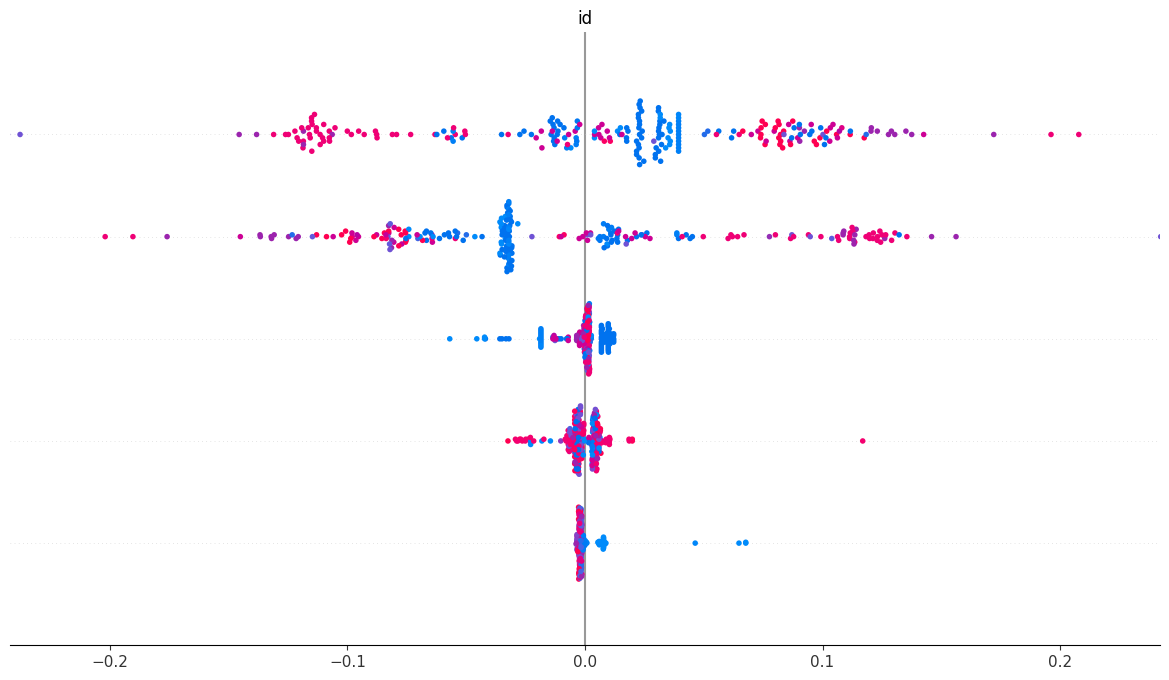

✅ Saved SHAP plot for 012ec_ouvrage in: plots/SHAP_RawData-Cibles.xlsx_Poutres_Plots/012ec_ouvrage_SHAP.png
📌 Final shape after SHAP processing: (246, 22)
🔍 Analyzing SHAP for target: 013ec_localisation
📌 Initial shape before SHAP processing: (246, 26)
📊 SHAP values shape: 246, Feature matrix shape: (246, 22)


<Figure size 640x480 with 0 Axes>

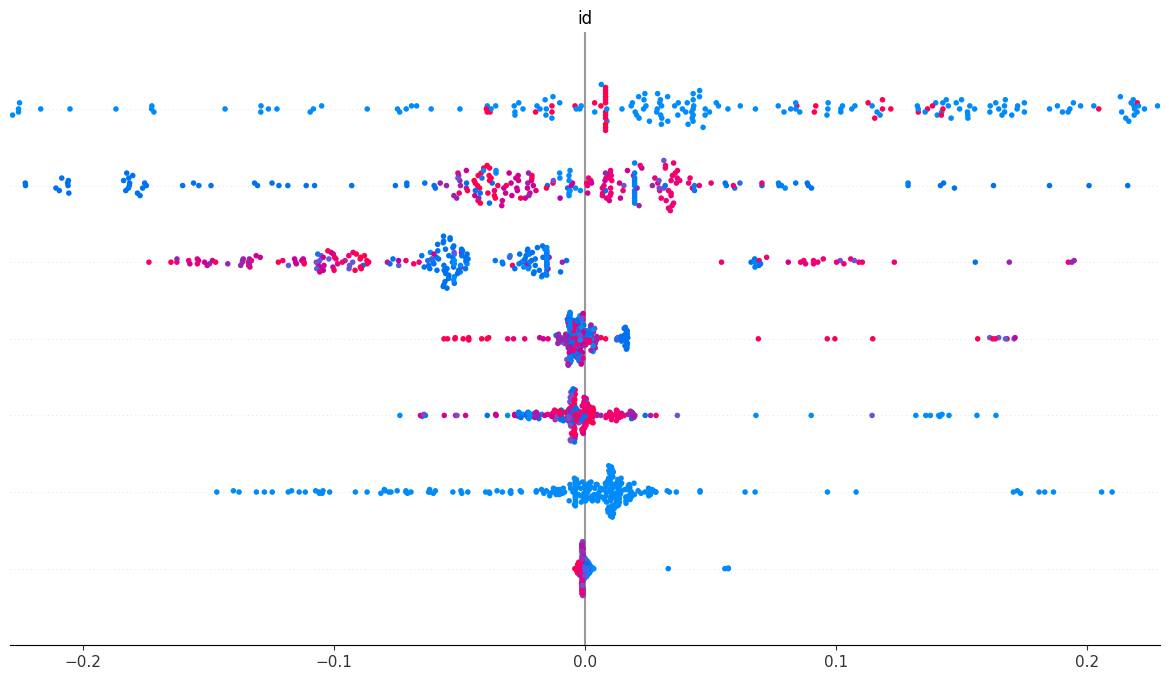

✅ Saved SHAP plot for 013ec_localisation in: plots/SHAP_RawData-Cibles.xlsx_Poutres_Plots/013ec_localisation_SHAP.png
📌 Final shape after SHAP processing: (246, 22)
🔍 Analyzing SHAP for target: 014ec_mode_constructif
📌 Initial shape before SHAP processing: (246, 26)
📊 SHAP values shape: 246, Feature matrix shape: (246, 22)


<Figure size 640x480 with 0 Axes>

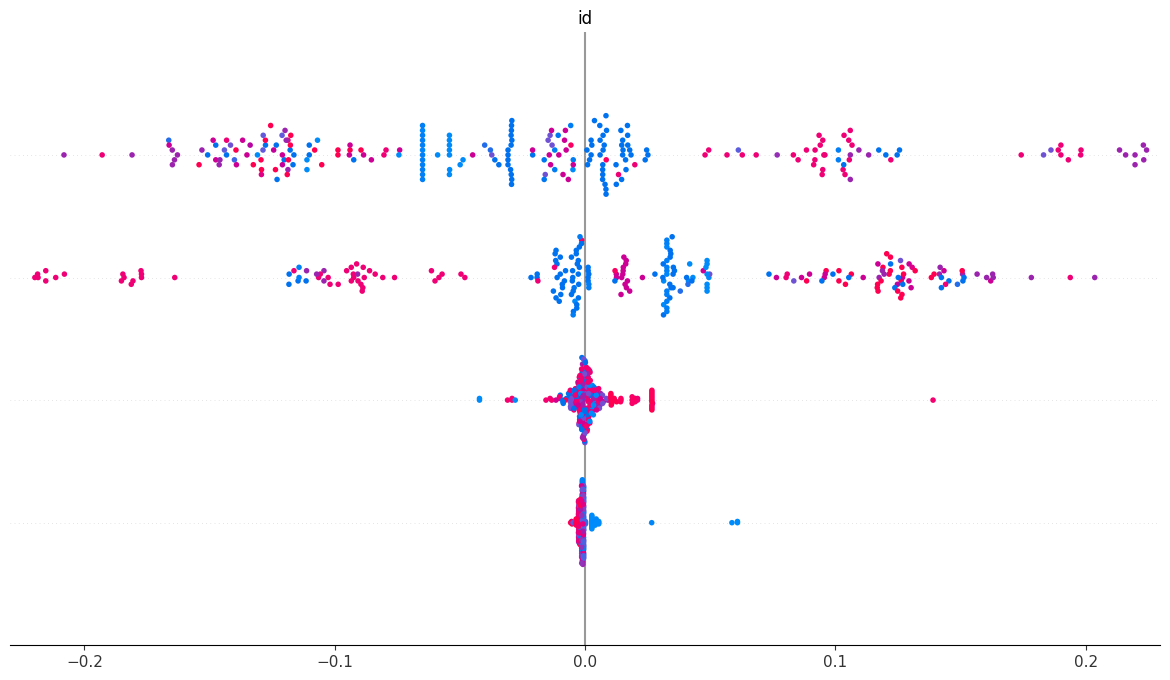

✅ Saved SHAP plot for 014ec_mode_constructif in: plots/SHAP_RawData-Cibles.xlsx_Poutres_Plots/014ec_mode_constructif_SHAP.png
📌 Final shape after SHAP processing: (246, 22)

Processing SHAP for RawData-Cibles.xlsx_Poteaux...
🎯 Target columns found in RawData-Cibles.xlsx_Poteaux: ['012ec_ouvrage', '013ec_localisation', '014ec_mode_constructif']
🔍 Analyzing SHAP for target: 012ec_ouvrage
📌 Initial shape before SHAP processing: (68, 17)
📊 SHAP values shape: 68, Feature matrix shape: (68, 14)


<Figure size 640x480 with 0 Axes>

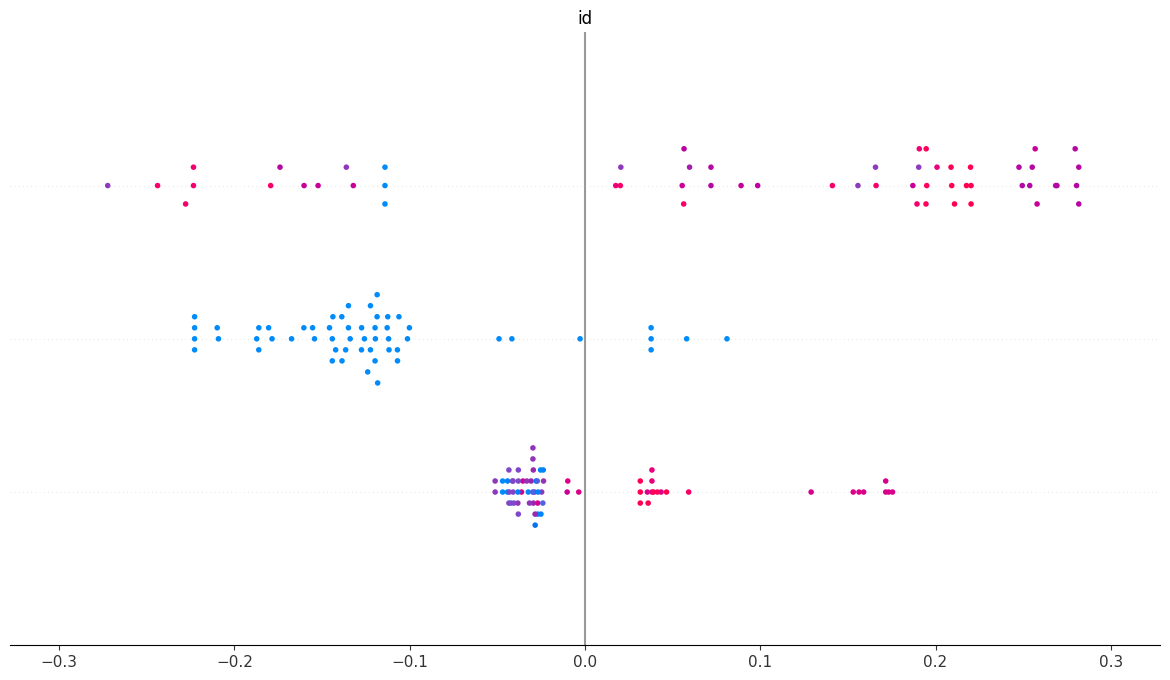

✅ Saved SHAP plot for 012ec_ouvrage in: plots/SHAP_RawData-Cibles.xlsx_Poteaux_Plots/012ec_ouvrage_SHAP.png
📌 Final shape after SHAP processing: (68, 14)
🔍 Analyzing SHAP for target: 013ec_localisation
📌 Initial shape before SHAP processing: (68, 17)
📊 SHAP values shape: 68, Feature matrix shape: (68, 14)


<Figure size 640x480 with 0 Axes>

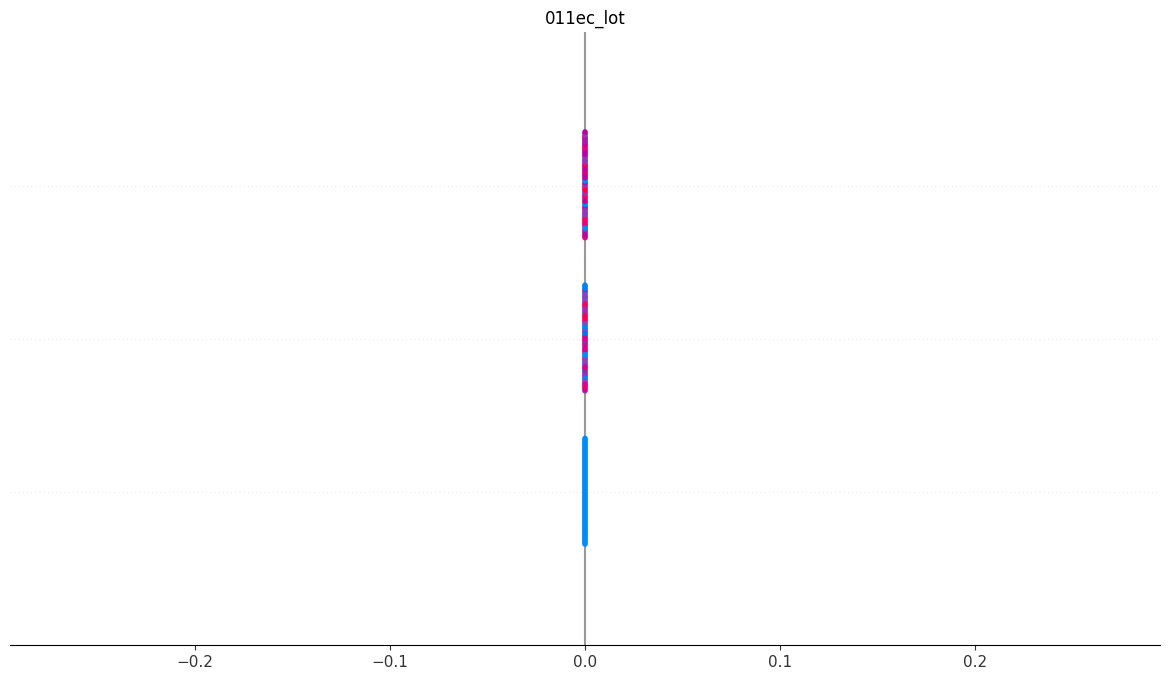

✅ Saved SHAP plot for 013ec_localisation in: plots/SHAP_RawData-Cibles.xlsx_Poteaux_Plots/013ec_localisation_SHAP.png
📌 Final shape after SHAP processing: (68, 14)
🔍 Analyzing SHAP for target: 014ec_mode_constructif
📌 Initial shape before SHAP processing: (68, 17)
📊 SHAP values shape: 68, Feature matrix shape: (68, 14)


<Figure size 640x480 with 0 Axes>

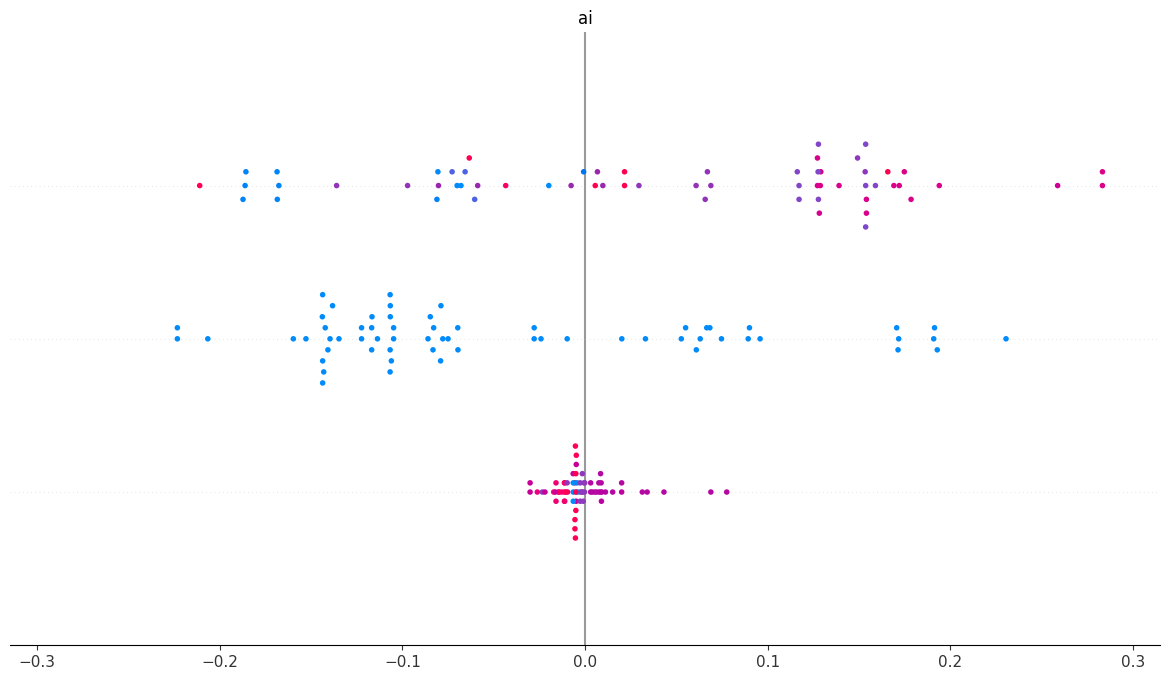

✅ Saved SHAP plot for 014ec_mode_constructif in: plots/SHAP_RawData-Cibles.xlsx_Poteaux_Plots/014ec_mode_constructif_SHAP.png
📌 Final shape after SHAP processing: (68, 14)


In [16]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import os

# Ensure SHAP initializes properly
shap.initjs()

# Function to create subfolder for SHAP plots
def get_plot_subfolder(file_name):
    subfolder_name = f"{file_name}_Plots"
    subfolder_path = os.path.join("plots", subfolder_name)  # Adjust path as needed

    # Create subfolder if it doesn’t exist
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

    return subfolder_path

# Loop through all fully processed dataframes
for df_name, df in final_cleaned_dataframes.items():  # ✅ Use fully processed dataset
    print(f"\nProcessing SHAP for {df_name}...")

    # Identify available target columns in the current dataframe
    existing_target_columns = [col for col in TARGET_COLUMNS if col in df.columns and df[col].nunique() > 1]

    if existing_target_columns:
        print(f"🎯 Target columns found in {df_name}: {existing_target_columns}")

        for target_column in existing_target_columns:
            print(f"🔍 Analyzing SHAP for target: {target_column}")

            # Display shape before training
            initial_shape = df.shape
            print(f"📌 Initial shape before SHAP processing: {initial_shape}")

            # Prepare the data
            X = df.drop(columns=existing_target_columns)  # Exclude target columns from features

            # Convert categorical columns in X to numeric
            for col in X.select_dtypes(include=["object"]).columns:
                X[col] = X[col].astype("category").cat.codes

            # Convert target column to numeric
            y = df[target_column].astype("category").cat.codes

            # Train RandomForestClassifier
            model = RandomForestClassifier()
            model.fit(X, y)

            # Compute SHAP values
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X)

            # Verify SHAP output shape before plotting
            print(f"📊 SHAP values shape: {len(shap_values)}, Feature matrix shape: {X.shape}")
            if isinstance(shap_values, list):
                shap_values = shap_values[0]  # Use first class for visualization in multi-class models

            # Create subfolder for SHAP plots
            plot_subfolder = get_plot_subfolder(f"SHAP_{df_name}")
            plot_path = os.path.join(plot_subfolder, f"{target_column}_SHAP.png")

            # Display & save SHAP summary plot
            shap.summary_plot(shap_values, X, show=False)
            plt.savefig(plot_path)
            plt.show()

            print(f"✅ Saved SHAP plot for {target_column} in: {plot_path}")

            # Display shape after SHAP analysis
            final_shape = X.shape
            print(f"📌 Final shape after SHAP processing: {final_shape}")

    else:
        print(f"⚠️ No valid target columns found in {df_name}. Skipping...")

## Training and testing 

Where to Go from Here?
🔹 Feature engineering: If accuracy is low, refine features further
🔹 Hyperparameter tuning: Optimize n_estimators, max_depth, etc.
🔹 Compare multiple models: Try XGBoost or SVM for better performance

Your Next Step
Run the model training and evaluation, then let me know if you'd like tuning suggestions or deeper insights! 🚀🔥
This is getting exciting—you're building something powerful! 💡


In [17]:
# Iterate over each dataframe in the dictionary and print its dtypes
for df_name, df in final_cleaned_dataframes.items():
	print(f"Dtypes for {df_name}:")
	print(df.dtypes)
	print("\n")

Dtypes for RawData-Cibles.xlsx_Murs:
id                              int64
011ec_lot                      object
012ec_ouvrage                  object
013ec_localisation             object
014ec_mode_constructif         object
hauteur                       float64
epaisseur                     float64
ai                            float64
as                            float64
sols_en_intersection            int64
sols_coupés_u                   int64
sols_coupants_u                 int64
sols_coupants_ids              object
sol_audessus                     bool
sol_endessous                    bool
fenêtres                        int64
portes                          int64
mur_multicouche                  bool
mur_empilé                       bool
profil_modifié                   bool
partie_inférieure_attachée      int64
partie_supérieure_attachée      int64
décalage_supérieur            float64
décalage_inférieur            float64
matériau_structurel            object
dtype: object

In [18]:
import pandas as pd

# Function to convert ID strings into a numeric count feature
def count_ids(id_string):
    """Convert string of IDs into a numeric count."""
    return len(id_string.split(",")) if isinstance(id_string, str) else 0

# Apply processing to fully cleaned datasets
for df_name, df in final_cleaned_dataframes.items():
    print(f"\n🔄 Processing ID count transformation for {df_name}...")

    # Identify relevant ID columns
    id_columns = [col for col in df.columns if any(keyword in col.lower() for keyword in ["coupés_(ids)", "coupants_(ids)"])]

    if id_columns:
        print(f"📌 Found ID columns: {id_columns}")

        # Transform ID columns into numeric count and drop originals
        df[[f"{col}_count" for col in id_columns]] = df[id_columns].applymap(count_ids)
        df.drop(columns=id_columns, inplace=True)  # Remove original text-based ID columns

    # Ensure only ID-related columns are converted to numeric
    df[id_columns] = df[id_columns].apply(pd.to_numeric, errors="coerce").fillna(0)

    # Store the updated dataframe
    final_cleaned_dataframes[df_name] = df

    print(f"✅ Final shape after ID count transformation: {df.shape}")

print("🚀 ID count transformation completed successfully!")


🔄 Processing ID count transformation for RawData-Cibles.xlsx_Murs...
✅ Final shape after ID count transformation: (312, 25)

🔄 Processing ID count transformation for RawData-Cibles.xlsx_Sols...
✅ Final shape after ID count transformation: (107, 24)

🔄 Processing ID count transformation for RawData-Cibles.xlsx_Poutres...
✅ Final shape after ID count transformation: (246, 26)

🔄 Processing ID count transformation for RawData-Cibles.xlsx_Poteaux...
✅ Final shape after ID count transformation: (68, 17)
🚀 ID count transformation completed successfully!


In [19]:
# Iterate over each dataframe in the dictionary and print its dtypes
for df_name, df in final_cleaned_dataframes.items():
	print(f"Dtypes for {df_name}:")
	print(df.dtypes)
	print("\n")

Dtypes for RawData-Cibles.xlsx_Murs:
id                              int64
011ec_lot                      object
012ec_ouvrage                  object
013ec_localisation             object
014ec_mode_constructif         object
hauteur                       float64
epaisseur                     float64
ai                            float64
as                            float64
sols_en_intersection            int64
sols_coupés_u                   int64
sols_coupants_u                 int64
sols_coupants_ids              object
sol_audessus                     bool
sol_endessous                    bool
fenêtres                        int64
portes                          int64
mur_multicouche                  bool
mur_empilé                       bool
profil_modifié                   bool
partie_inférieure_attachée      int64
partie_supérieure_attachée      int64
décalage_supérieur            float64
décalage_inférieur            float64
matériau_structurel            object
dtype: object

In [20]:
for df_name, df in final_cleaned_dataframes.items():
    categorical_cols = df.select_dtypes(include=["object"]).columns
    print(f"\n📌 {df_name} - Categorical Columns Before Encoding: {categorical_cols.tolist()}")


📌 RawData-Cibles.xlsx_Murs - Categorical Columns Before Encoding: ['011ec_lot', '012ec_ouvrage', '013ec_localisation', '014ec_mode_constructif', 'sols_coupants_ids', 'matériau_structurel']

📌 RawData-Cibles.xlsx_Sols - Categorical Columns Before Encoding: ['011ec_lot', '012ec_ouvrage', '013ec_localisation', '014ec_mode_constructif', 'murs_coupés_ids', 'poutres_coupés_ids', 'poteaux_coupés_ids', 'matériau_structurel']

📌 RawData-Cibles.xlsx_Poutres - Categorical Columns Before Encoding: ['011ec_lot', '012ec_ouvrage', '013ec_localisation', '014ec_mode_constructif', 'sols_coupants_ids', 'poteaux_coupés_ids', 'poteaux_coupants_ids', 'matériau_structurel']

📌 RawData-Cibles.xlsx_Poteaux - Categorical Columns Before Encoding: ['011ec_lot', '012ec_ouvrage', '013ec_localisation', '014ec_mode_constructif', 'sols_coupants_ids', 'poutres_coupés_ids', 'matériau_structurel']


In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Dictionaries to store encoders
feature_encoders = {}  # Stores encoders for feature columns
target_encoders = {}  # Stores encoders for target columns

# Encode features and targets separately
for df_name, df in final_cleaned_dataframes.items():
    print(f"\n🔄 Encoding categorical features for {df_name}...")

    # Identify categorical columns again after ID transformation
    categorical_cols = df.select_dtypes(include=["object"]).columns
    target_cols = [col for col in categorical_cols if col in TARGET_COLUMNS]
    feature_cols = [col for col in categorical_cols if col not in TARGET_COLUMNS]

    # Encode target columns
    for col in target_cols:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col].astype(str))
        target_encoders[f"{df_name}_{col}"] = encoder
        print(f"✅ Stored Target Encoder for {df_name} - {col}")

    # Encode feature columns
    one_hot_cols = []
    for col in feature_cols:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col].astype(str))
        feature_encoders[f"{df_name}_{col}"] = encoder
        print(f"✅ Stored Feature Encoder for {df_name} - {col}")
        one_hot_cols.append(col)  # Mark column for One-Hot Encoding if needed

    # Apply One-Hot Encoding only to select categorical variables
    if one_hot_cols:
        encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
        encoded_values = encoder.fit_transform(df[one_hot_cols])

        # Create a new DataFrame with proper column names
        encoded_df = pd.DataFrame(encoded_values, index=df.index, columns=encoder.get_feature_names_out(one_hot_cols))

        # Remove original one-hot columns and add encoded features
        df.drop(columns=one_hot_cols, inplace=True)
        df = pd.concat([df, encoded_df], axis=1)

    # Save updated dataframe
    final_cleaned_dataframes[df_name] = df

    print(f"✅ Successfully encoded categorical features for {df_name}. New shape: {df.shape}")

print("🚀 Final categorical encoding applied successfully across all datasets!")


🔄 Encoding categorical features for RawData-Cibles.xlsx_Murs...
✅ Stored Target Encoder for RawData-Cibles.xlsx_Murs - 011ec_lot
✅ Stored Target Encoder for RawData-Cibles.xlsx_Murs - 012ec_ouvrage
✅ Stored Target Encoder for RawData-Cibles.xlsx_Murs - 013ec_localisation
✅ Stored Target Encoder for RawData-Cibles.xlsx_Murs - 014ec_mode_constructif
✅ Stored Feature Encoder for RawData-Cibles.xlsx_Murs - sols_coupants_ids
✅ Stored Feature Encoder for RawData-Cibles.xlsx_Murs - matériau_structurel
✅ Successfully encoded categorical features for RawData-Cibles.xlsx_Murs. New shape: (312, 99)

🔄 Encoding categorical features for RawData-Cibles.xlsx_Sols...
✅ Stored Target Encoder for RawData-Cibles.xlsx_Sols - 011ec_lot
✅ Stored Target Encoder for RawData-Cibles.xlsx_Sols - 012ec_ouvrage
✅ Stored Target Encoder for RawData-Cibles.xlsx_Sols - 013ec_localisation
✅ Stored Target Encoder for RawData-Cibles.xlsx_Sols - 014ec_mode_constructif
✅ Stored Feature Encoder for RawData-Cibles.xlsx_Sols

/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py

In [22]:
for df_name, df in final_cleaned_dataframes.items():
    categorical_cols = df.select_dtypes(include=["object"]).columns
    print(f"\n📌 {df_name} - Categorical Columns After Encoding: {categorical_cols.tolist()}")


📌 RawData-Cibles.xlsx_Murs - Categorical Columns After Encoding: []

📌 RawData-Cibles.xlsx_Sols - Categorical Columns After Encoding: []

📌 RawData-Cibles.xlsx_Poutres - Categorical Columns After Encoding: []

📌 RawData-Cibles.xlsx_Poteaux - Categorical Columns After Encoding: []


In [23]:
from sklearn.model_selection import train_test_split

# Split each fully processed dataframe into train & test sets
train_test_data = {}

for df_name, df in final_cleaned_dataframes.items():
    existing_target_columns = [col for col in TARGET_COLUMNS if col in df.columns]

    if existing_target_columns:
        print(f"\n🚀 Preparing train-test split for {df_name} - Target columns: {existing_target_columns}")

        for target_column in existing_target_columns:
            print(f"📌 Splitting data for target: {target_column}")

            X = df.drop(columns=existing_target_columns)  # Features
            y = df[target_column]  # Target

            # Skip datasets with only one unique target value
            if y.nunique() == 1:
                print(f"⚠️ Skipping {df_name}_{target_column}: Only one class present.")
                continue  # Prevent model training on single-class datasets

            # Perform train-test split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Remove duplicate samples across train-test
            X_train = X_train.drop_duplicates()
            X_test = X_test.drop_duplicates()
            y_train = y_train.loc[X_train.index]
            y_test = y_test.loc[X_test.index]

            # Save the clean train-test split
            train_test_data[f"{df_name}_{target_column}"] = (X_train, X_test, y_train, y_test)

            print(f"✅ Completed train-test split for {df_name} - {target_column}. Shapes:")
            print(f"   📊 X_train: {X_train.shape}, X_test: {X_test.shape}")
            print(f"   🎯 y_train: {y_train.shape}, y_test: {y_test.shape}")

print("🚀 All datasets successfully split into train & test sets!")


🚀 Preparing train-test split for RawData-Cibles.xlsx_Murs - Target columns: ['011ec_lot', '012ec_ouvrage', '013ec_localisation', '014ec_mode_constructif']
📌 Splitting data for target: 011ec_lot
⚠️ Skipping RawData-Cibles.xlsx_Murs_011ec_lot: Only one class present.
📌 Splitting data for target: 012ec_ouvrage
✅ Completed train-test split for RawData-Cibles.xlsx_Murs - 012ec_ouvrage. Shapes:
   📊 X_train: (249, 95), X_test: (63, 95)
   🎯 y_train: (249,), y_test: (63,)
📌 Splitting data for target: 013ec_localisation
✅ Completed train-test split for RawData-Cibles.xlsx_Murs - 013ec_localisation. Shapes:
   📊 X_train: (249, 95), X_test: (63, 95)
   🎯 y_train: (249,), y_test: (63,)
📌 Splitting data for target: 014ec_mode_constructif
✅ Completed train-test split for RawData-Cibles.xlsx_Murs - 014ec_mode_constructif. Shapes:
   📊 X_train: (249, 95), X_test: (63, 95)
   🎯 y_train: (249,), y_test: (63,)

🚀 Preparing train-test split for RawData-Cibles.xlsx_Sols - Target columns: ['011ec_lot', '0

In [24]:
import pandas as pd

for key, (X_train, X_test, y_train, y_test) in train_test_data.items():
    df_combined = pd.concat([X_train, y_train], axis=1)  # Combine features and target
    print(f"\n🔍 Checking correlation for {key}:")
    print(df_combined.corr().iloc[-1])  # Last row shows correlation of features with target

for key, (X_train, X_test, y_train, y_test) in train_test_data.items():
    duplicates = X_train.merge(X_test, how='inner')
    print(f"\n🔍 Duplicate samples between train and test for {key}: {duplicates.shape[0]}")

for key, (X_train, X_test, y_train, y_test) in train_test_data.items():
    print(f"\n🔍 Class distribution for {key}:")
    print(y_train.value_counts(normalize=True))  # Show percentage of each class in training data


🔍 Checking correlation for RawData-Cibles.xlsx_Murs_012ec_ouvrage:
id                       0.001475
hauteur                 -0.236034
epaisseur                0.302181
ai                      -0.002918
as                      -0.127507
                           ...   
sols_coupants_ids_72    -0.006487
sols_coupants_ids_73    -0.006487
matériau_structurel_0    0.074199
matériau_structurel_1   -0.074199
012ec_ouvrage            1.000000
Name: 012ec_ouvrage, Length: 96, dtype: float64

🔍 Checking correlation for RawData-Cibles.xlsx_Murs_013ec_localisation:
id                      -0.074441
hauteur                  0.319297
epaisseur               -0.362515
ai                       0.303750
as                       0.449345
                           ...   
sols_coupants_ids_72    -0.026953
sols_coupants_ids_73    -0.026953
matériau_structurel_0   -0.377129
matériau_structurel_1    0.377129
013ec_localisation       1.000000
Name: 013ec_localisation, Length: 96, dtype: float64

🔍 Checkin

In [25]:
print(train_test_data.keys())

dict_keys(['RawData-Cibles.xlsx_Murs_012ec_ouvrage', 'RawData-Cibles.xlsx_Murs_013ec_localisation', 'RawData-Cibles.xlsx_Murs_014ec_mode_constructif', 'RawData-Cibles.xlsx_Sols_012ec_ouvrage', 'RawData-Cibles.xlsx_Sols_013ec_localisation', 'RawData-Cibles.xlsx_Sols_014ec_mode_constructif', 'RawData-Cibles.xlsx_Poutres_011ec_lot', 'RawData-Cibles.xlsx_Poutres_012ec_ouvrage', 'RawData-Cibles.xlsx_Poutres_013ec_localisation', 'RawData-Cibles.xlsx_Poutres_014ec_mode_constructif', 'RawData-Cibles.xlsx_Poteaux_012ec_ouvrage', 'RawData-Cibles.xlsx_Poteaux_013ec_localisation', 'RawData-Cibles.xlsx_Poteaux_014ec_mode_constructif'])


In [26]:
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Train and evaluate models on each dataset
# model_results = {}

# for key, (X_train, X_test, y_train, y_test) in train_test_data.items():
#     print(f"\n🚀 Training model for {key}...")

#     # Train a Random Forest model
#     model = RandomForestClassifier(n_estimators=100, random_state=42)
#     model.fit(X_train, y_train)

#     # Predictions
#     y_train_pred = model.predict(X_train)  # Predictions on training data
#     y_test_pred = model.predict(X_test)  # Predictions on test data

#     # Evaluate accuracy
#     train_accuracy = accuracy_score(y_train, y_train_pred)
#     test_accuracy = accuracy_score(y_test, y_test_pred)
#     model_results[key] = (train_accuracy, test_accuracy)

#     print(f"📊 Training Accuracy for {key}: {train_accuracy:.4f}")
#     print(f"🎯 Test Accuracy for {key}: {test_accuracy:.4f}")

# # Plot Learning Curve
# plt.figure(figsize=(10, 5))

# train_accs = [train_accuracy for train_accuracy, _ in model_results.values()]
# test_accs = [test_accuracy for _, test_accuracy in model_results.values()]
# datasets = list(model_results.keys())

# plt.plot(datasets, train_accs, marker='o', label="Training Accuracy", color="blue")
# plt.plot(datasets, test_accs, marker='s', label="Test Accuracy", color="red")

# plt.xticks(rotation=90)
# plt.ylabel("Accuracy")
# plt.title("Model Learning Curve Across Datasets")
# plt.legend()
# plt.grid(True)
# plt.show()

In [27]:
# %pip install xgboost
# %pip install lightgbm

In [28]:
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

Unique values in y_train: [0 1 2]
Unique values in y_test: [0 1]


In [ ]:
import numpy as np
import os
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Create necessary directories
os.makedirs('plots', exist_ok=True)
os.makedirs('models', exist_ok=True)

# Define ML models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(random_state=42, max_depth=10, num_leaves=31),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),  # Reduced neighbors to speed up training
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5),  # Reduced max depth
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, random_state=42),
}

def evaluate_models(X_train, y_train, X_test, y_test, dataset_name):
    results = {}

    for name, model in models.items():
        print(f"🚀 Training {name} on {dataset_name}...")

        try:
            # Cross-validation (Reduced CV folds)
            cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)

            # Model Training
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Evaluation Metrics
            test_accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred, output_dict=True)

            # Store results
            results[name] = {
                'cv_mean': cv_scores.mean(),
                'cv_std': cv_scores.std(),
                'test_accuracy': test_accuracy,
                'report': report
            }

            # Save Confusion Matrix Plot
            plt.figure(figsize=(8, 6))
            cm = confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
            plt.title(f'{name} - {dataset_name}')
            plt.savefig(f'plots/{dataset_name}_{name.replace(" ", "_")}_cm.png')
            plt.close()

            # Save Model
            joblib.dump(model, f'models/{dataset_name}_{name.replace(" ", "_")}.pkl')

        except Exception as e:
            print(f"⚠️ Error with {name}: {e}")

    return results

def plot_learning_curve(model, X_train, y_train, dataset_name, model_name):
    try:
        # Reduce the number of training sizes to speed up learning curve computation
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.2, 1.0, 5)
        )

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)

        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_mean, 'o-', label="Training Score", color="blue")
        plt.plot(train_sizes, test_mean, 'o-', label="Cross-Validation Score", color="red")
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
        plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")
        plt.title(f"Learning Curve: {model_name} - {dataset_name}")
        plt.xlabel("Training Set Size")
        plt.ylabel("Accuracy")
        plt.legend(loc="best")
        plt.grid()
        plt.savefig(f'plots/{dataset_name}_{model_name.replace(" ", "_")}_learning_curve.png')
        plt.close()

    except Exception as e:
        print(f"⚠️ Learning curve error for {model_name}: {e}")

# Run evaluation for all datasets
all_results = {}

for key, (X_train, X_test, y_train, y_test) in train_test_data.items():
    dataset_name = key.split("_")[0]
    results = evaluate_models(X_train, y_train, X_test, y_test, dataset_name)
    all_results[dataset_name] = results

    for model_name, model in models.items():
        plot_learning_curve(model, X_train, y_train, dataset_name, model_name)

# Rank models based on test accuracy
ranked_models = {}

for dataset_name, results in all_results.items():
    ranked = sorted(results.items(), key=lambda x: x[1]['test_accuracy'], reverse=True)
    ranked_models[dataset_name] = ranked
    print(f"\n📊 Ranking for {dataset_name}:")
    for rank, (model_name, metrics) in enumerate(ranked, start=1):
        print(f"{rank}. {model_name} - Test Accuracy: {metrics['test_accuracy']:.4f}")

print("🚀 Model evaluation and ranking completed!")

🚀 Training Random Forest on RawData-Cibles.xlsx...


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


🚀 Training XGBoost on RawData-Cibles.xlsx...


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
2 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/psyko/.pyenv/versions/BImpr

🚀 Training LightGBM on RawData-Cibles.xlsx...


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 166, number of used features: 15
[LightGBM] [Info] Start training from score -5.111988
[LightGBM] [Info] Start training from score -4.418841
[LightGBM] [Info] Start training from score -0.062132
[LightGBM] [Info] Start training from score -4.418841
[LightGBM] [Info] Start training from score -3.725693
[LightGBM] [Info] Start training from score -5.111988
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


🚀 Training Logistic Regression on RawData-Cibles.xlsx...


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classificati

🚀 Training SVM on RawData-Cibles.xlsx...


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classificati

🚀 Training KNN on RawData-Cibles.xlsx...


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classificati

🚀 Training Decision Tree on RawData-Cibles.xlsx...


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: Unde

🚀 Training AdaBoost on RawData-Cibles.xlsx...


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classificati

🚀 Training Gradient Boosting on RawData-Cibles.xlsx...


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: Unde

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 33, number of used features: 0[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.163224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 171

[LightGBM] [Info] Start training from score -3.496508
[LightGBM] [Info] Start training from score -0.164303
[LightGBM] [Info] Start training from score -3.496508
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Number of data points in the train set: 132, number of used features: 15
[LightGBM] [Info] Start training from score -4.882802
[LightGBM] [Info] Start training from score -0.070618
[LightGBM] [Info] Start training from score -4.18965

/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

🚀 Training Random Forest on RawData-Cibles.xlsx...
🚀 Training XGBoost on RawData-Cibles.xlsx...
🚀 Training LightGBM on RawData-Cibles.xlsx...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 166, number of used features: 15
[LightGBM] [Info] Start training from score -3.502550
[LightGBM] [Info] Start training from score -3.502550
[LightGBM] [Info] Start training from score -2.339399
[LightGBM] [Info] Start training from score -1.556640
[LightGBM] [Info] Start training from score -0.568693
[LightGBM] [Info] Start training from score -2.714093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

🚀 Training SVM on RawData-Cibles.xlsx...


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

🚀 Training KNN on RawData-Cibles.xlsx...


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


🚀 Training Decision Tree on RawData-Cibles.xlsx...


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

🚀 Training AdaBoost on RawData-Cibles.xlsx...


/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/psyko/.pyenv/versions/BImpredict2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

🚀 Training Gradient Boosting on RawData-Cibles.xlsx...
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 33, number of used features: 0
[LightGBM] [Info] Start training from score -1.704748
[LightGBM] [Info] Start training from score -0.277632
[LightGBM] [Info] Start training from score -2.803360
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.[LightGBM] [Warning]

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Create necessary directories
os.makedirs('plots', exist_ok=True)
os.makedirs('models', exist_ok=True)

# Define ML models
models = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(),
    "SVM": SVC(kernel="rbf", probability=True),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# Define hyperparameter search spaces
param_spaces = {
    "Random Forest": {
        'n_estimators': Integer(50, 500),
        'max_depth': Integer(3, 20),
        'min_samples_split': Integer(2, 10),
        'max_features': Categorical(['sqrt', 'log2'])
    },
    "XGBoost": {
        'n_estimators': Integer(50, 500),
        'max_depth': Integer(3, 15),
        'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
        'subsample': Real(0.6, 1.0),
        'colsample_bytree': Real(0.6, 1.0)
    },
    "LightGBM": {
        'num_leaves': Integer(20, 100),
        'max_depth': Integer(3, 15),
        'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
        'feature_fraction': Real(0.6, 1.0),
        'bagging_fraction': Real(0.6, 1.0)
    },
    "SVM": {
        'C': Real(0.1, 10, prior='log-uniform'),
        'kernel': Categorical(['linear', 'rbf']),
        'gamma': Real(0.01, 1, prior='log-uniform')
    },
    "Logistic Regression": {
        'C': Real(0.1, 10, prior='log-uniform'),
        'solver': Categorical(['liblinear', 'lbfgs', 'saga'])
    },
    "KNN": {
        'n_neighbors': Integer(3, 15),
        'weights': Categorical(['uniform', 'distance']),
        'metric': Categorical(['euclidean', 'manhattan', 'minkowski'])
    },
    "AdaBoost": {
        'n_estimators': Integer(50, 500),
        'learning_rate': Real(0.01, 1, prior='log-uniform')
    },
    "Gradient Boosting": {
        'n_estimators': Integer(50, 500),
        'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
        'max_depth': Integer(3, 15)
    }
}

def optimize_model(model, param_space, X_train, y_train):
    """Bayesian optimization of hyperparameters."""
    opt = BayesSearchCV(
        model,
        param_space,
        n_iter=50,  # Number of optimization steps
        cv=3,  # Reduced CV for faster tuning
        scoring='accuracy',
        random_state=42,
        n_jobs=-1  # Uses all available CPU cores
    )

    opt.fit(X_train, y_train)
    return opt.best_estimator_, opt.best_score_

def plot_learning_curve(model, X_train, y_train, dataset_name, model_name):
    """Plots and saves the learning curve."""
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.2, 1.0, 5)
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', label="Training Score", color="blue")
    plt.plot(train_sizes, test_mean, 'o-', label="Cross-Validation Score", color="red")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")
    plt.title(f"Learning Curve: {model_name} - {dataset_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.savefig(f'plots/{dataset_name}_{model_name.replace(" ", "_")}_learning_curve.png')
    plt.close()

def tune_all_models(X_train, y_train, dataset_name):
    """Runs hyperparameter optimization, saves models, and ranks them."""
    best_models = {}

    for model_name, param_space in param_spaces.items():
        print(f"\n🔍 Optimizing {model_name} for {dataset_name}...")
        best_model, best_score = optimize_model(models[model_name], param_space, X_train, y_train)
        best_models[model_name] = (best_model, best_score)

        print(f"✅ Best {model_name} Model: {best_model}")
        print(f"🎯 Best Accuracy Score: {best_score:.4f}")

        # Save Model
        joblib.dump(best_model, f'models/{dataset_name}_{model_name.replace(" ", "_")}.pkl')

        # Plot Learning Curve
        plot_learning_curve(best_model, X_train, y_train, dataset_name, model_name)

    # Rank models from best to worst
    ranked_models = sorted(best_models.items(), key=lambda x: x[1][1], reverse=True)

    print(f"\n📊 Ranking for {dataset_name}:")
    for rank, (model_name, (model, score)) in enumerate(ranked_models, start=1):
        print(f"{rank}. {model_name} - Best Accuracy: {score:.4f}")

    return ranked_models

## Deep Learning

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Extract X_train and X_test from train_test_data
from sklearn.model_selection import train_test_split

# Ensure train_test_data is populated
if not train_test_data:
	# Use the first dataset from final_cleaned_dataframes as an example
	df_name, df = list(final_cleaned_dataframes.items())[0]
	existing_target_columns = [col for col in TARGET_COLUMNS if col in df.columns]

	if existing_target_columns:
		target_column = existing_target_columns[0]  # Use the first target column
		X = df.drop(columns=existing_target_columns)  # Features
		y = df[target_column]  # Target

		# Perform train-test split
		X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

		# Save the split data into train_test_data
		train_test_data[df_name] = (X_train, X_test, y_train, y_test)
	else:
		raise ValueError("No target columns found in the dataset. Ensure that the target columns are correctly defined.")

# Use the first dataset from train_test_data
key = list(train_test_data.keys())[0]
X_train, X_test, y_train, y_test = train_test_data[key]

# Dynamically identify text columns
text_columns = X_train.select_dtypes(include=["object"]).columns.tolist()
print(f"Text columns detected: {text_columns}")

# Ensure that X_train_encoded and X_test_encoded are DataFrames with the correct indices
X_train_encoded = pd.DataFrame(X_train, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test, index=X_test.index)

# Check if text_columns is not empty
if text_columns:
	# Combine text data from the specified columns
	text_data = X_train[text_columns].fillna("").apply(lambda x: " ".join(x), axis=1)

	# Initialize TfidfVectorizer
	vectorizer = TfidfVectorizer(max_features=500)  # Adjust max_features as needed

	# Fit and transform the training data
	X_train_text = pd.DataFrame(vectorizer.fit_transform(text_data).toarray(), index=X_train.index)

	# Transform the test data
	text_data_test = X_test[text_columns].fillna("").apply(lambda x: " ".join(x), axis=1)
	X_test_text = pd.DataFrame(vectorizer.transform(text_data_test).toarray(), index=X_test.index)
else:
	print("⚠️ No text columns detected. Skipping text feature processing.")
	# Create empty DataFrame for text features
	X_train_text = pd.DataFrame(index=X_train.index)
	X_test_text = pd.DataFrame(index=X_test.index)

# Ensure the indices of X_train_text and X_train_encoded match
X_train_text = X_train_text.reindex(X_train_encoded.index)
X_test_text = X_test_text.reindex(X_test_encoded.index)

# Combine the processed textual features with the existing numerical features
X_train_combined = np.hstack([X_train_encoded, X_train_text])
X_test_combined = np.hstack([X_test_encoded, X_test_text])

print(f"X_train_combined shape: {X_train_combined.shape}")
print(f"X_test_combined shape: {X_test_combined.shape}")


🔹 BERT or GPT → If text has complex relationships
🔹 LSTM or GRU → If text has sequential meaning
🔹 CNN for NLP → If local word patterns matte


🚀 Machine Learning Models
If your data is structured (numerical/tabular), traditional ML methods may work well: ✅ Decision Trees & Random Forest → Good for structured data, feature importance analysis
✅ Gradient Boosting (XGBoost, LightGBM, CatBoost) → Powerful for tabular data with boosting techniques
✅ Support Vector Machines (SVM) → Great for classification problems
✅ K-Nearest Neighbors (KNN) → Simple but useful for certain cases
✅ Logistic Regression → Best for binary classification
🔥 Deep Learning Architectures
If you have images, text, or highly complex patterns, DL might be a better choice: ✅ Convolutional Neural Networks (CNNs) → Best for image processing
✅ Recurrent Neural Networks (RNNs) & LSTMs → Designed for sequential data (like time series or language models)
✅ Transformers (BERT, GPT) → Cutting-edge for NLP and deep sequence understanding
✅ Autoencoders & GANs → Used for generative tasks or anomaly detection

